In [1]:
library(fpp3)

── Attaching packages ────────────────────────────────────────────── fpp3 0.5 ──

✔ tibble      3.2.1     ✔ tsibble     1.1.3
✔ dplyr       1.1.4     ✔ tsibbledata 0.4.1
✔ tidyr       1.3.0     ✔ feasts      0.3.1
✔ lubridate   1.9.3     ✔ fable       0.3.3
✔ ggplot2     3.4.4     ✔ fabletools  0.3.4

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



ARIMA

9.1 -- stationarity and differencing

In [2]:
google_2015 <- gafa_stock |> filter(Symbol == "GOOG", year(Date) == 2015)

In [3]:
head(google_2015)

Symbol,Date,Open,High,Low,Close,Adj_Close,Volume
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GOOG,2015-01-02,526.1147,528.3624,521.2316,521.9377,521.9377,1447600
GOOG,2015-01-05,520.3962,521.4604,510.2520,511.0576,511.0576,2059800
GOOG,2015-01-06,512.1815,513.3500,498.3078,499.2128,499.2128,2899900
GOOG,2015-01-07,504.2252,504.4679,496.9154,498.3575,498.3575,2065100
GOOG,2015-01-08,495.2645,500.7245,488.3128,499.9289,499.9289,3353600
GOOG,2015-01-09,501.9975,502.1566,492.0821,493.4545,493.4545,2069400


In [4]:
options(repr.plot.width = 16, repr.plot.height = 14)

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


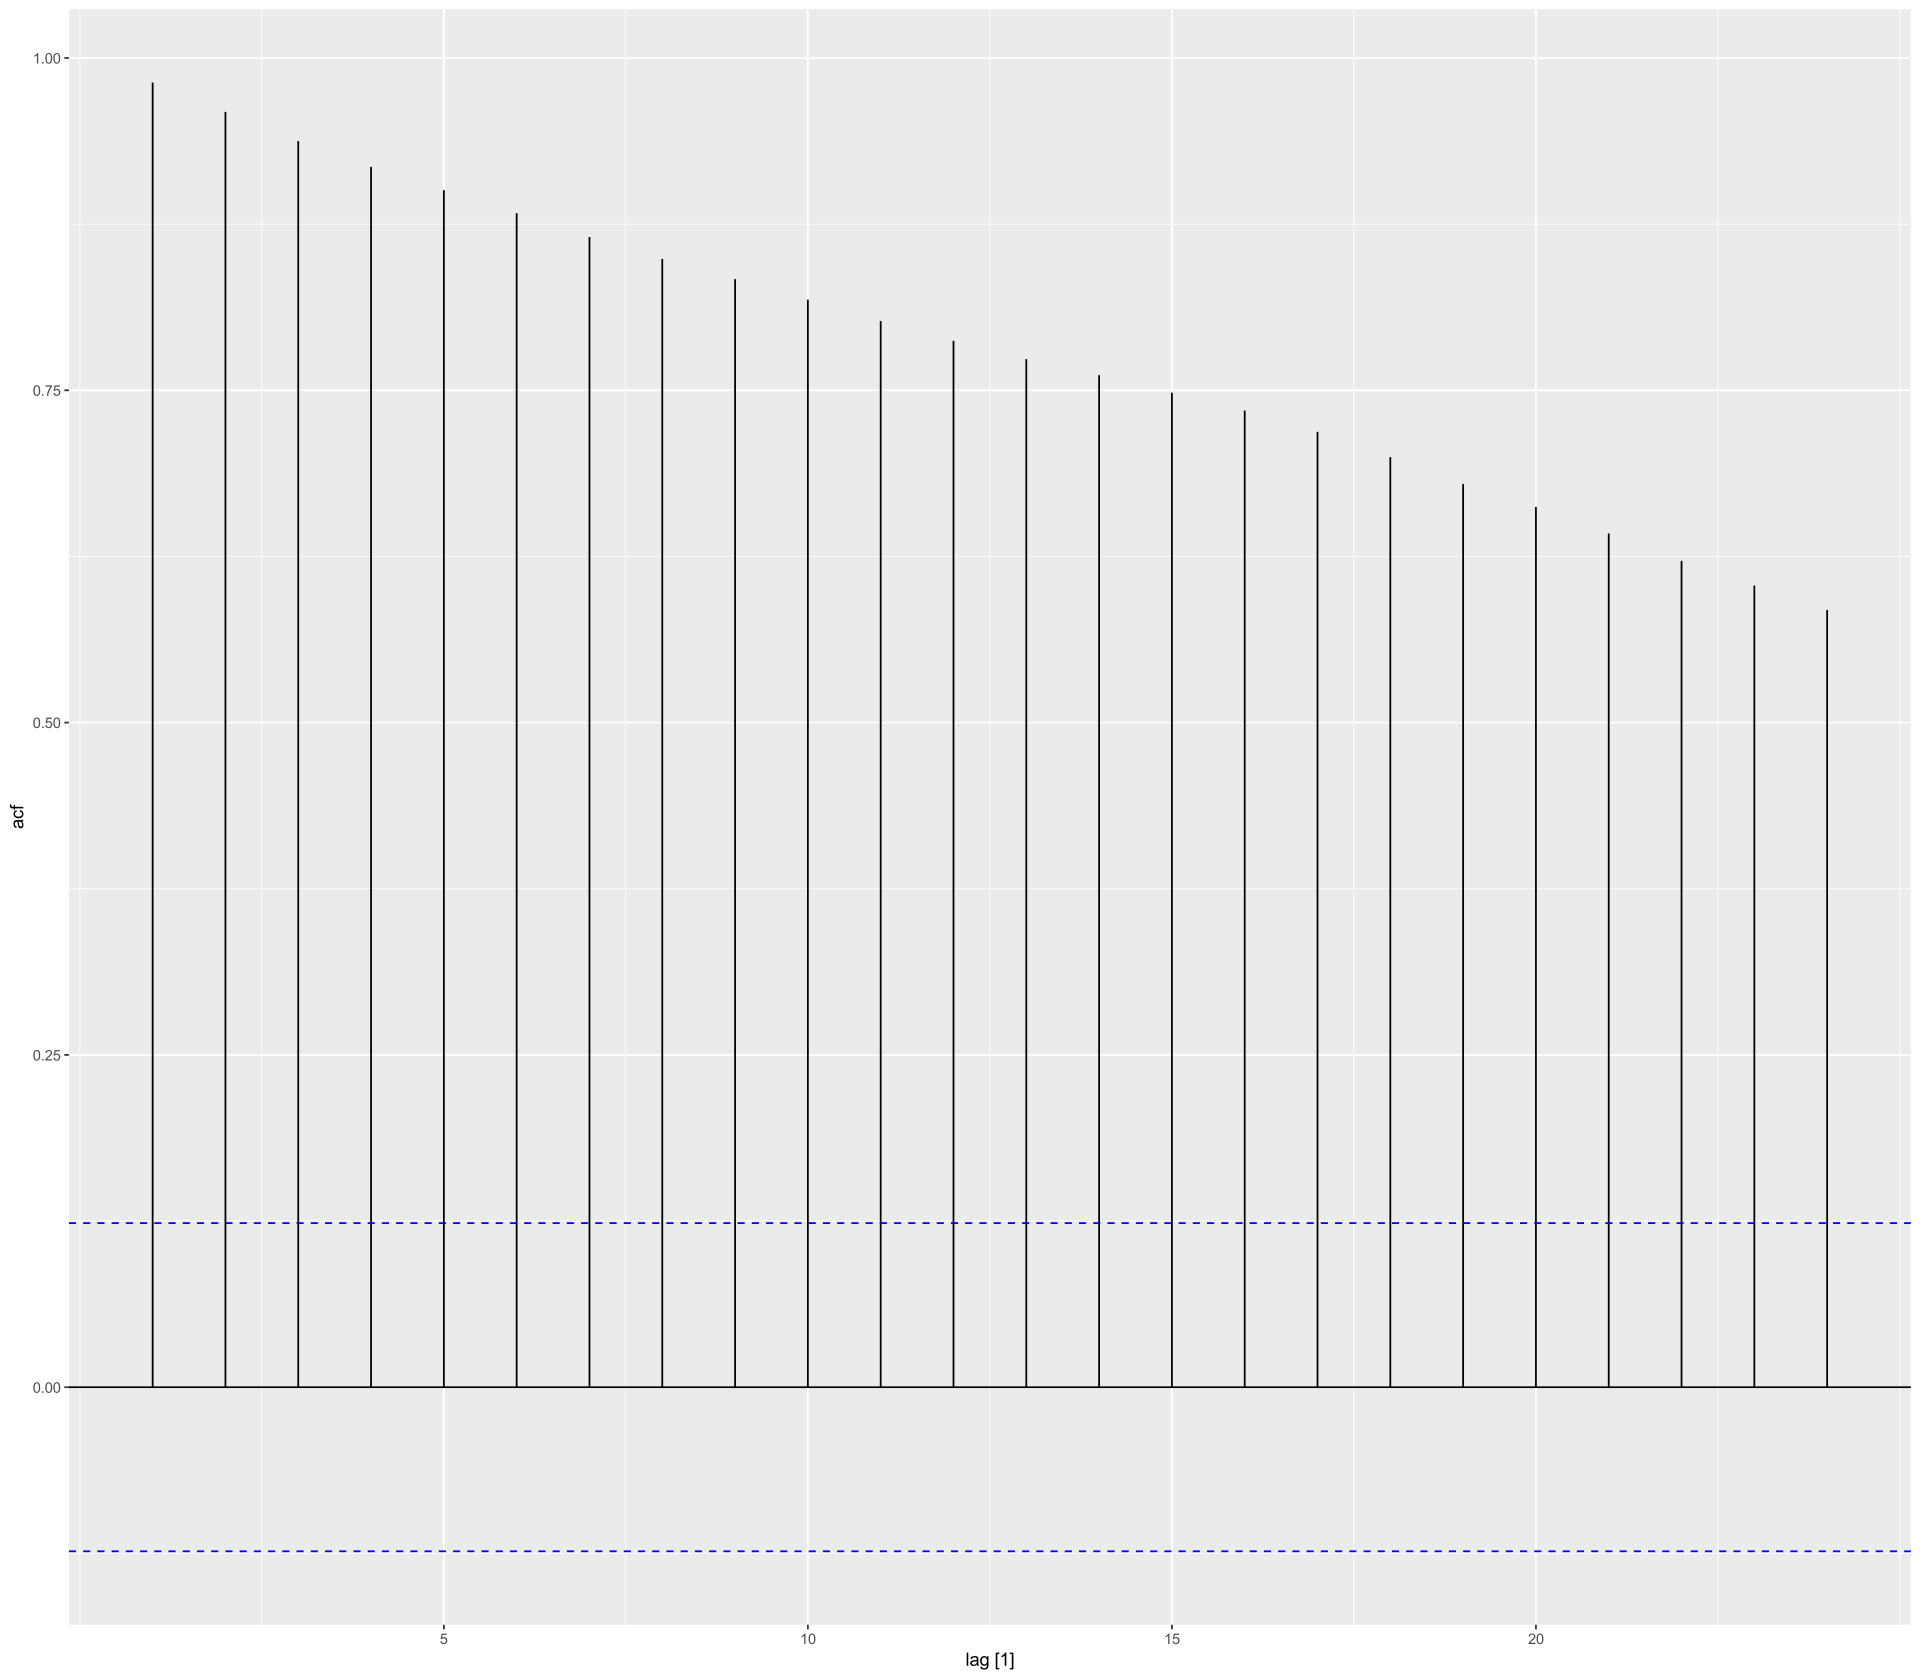

In [5]:
google_2015 |>ACF(Close)|>autoplot()

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


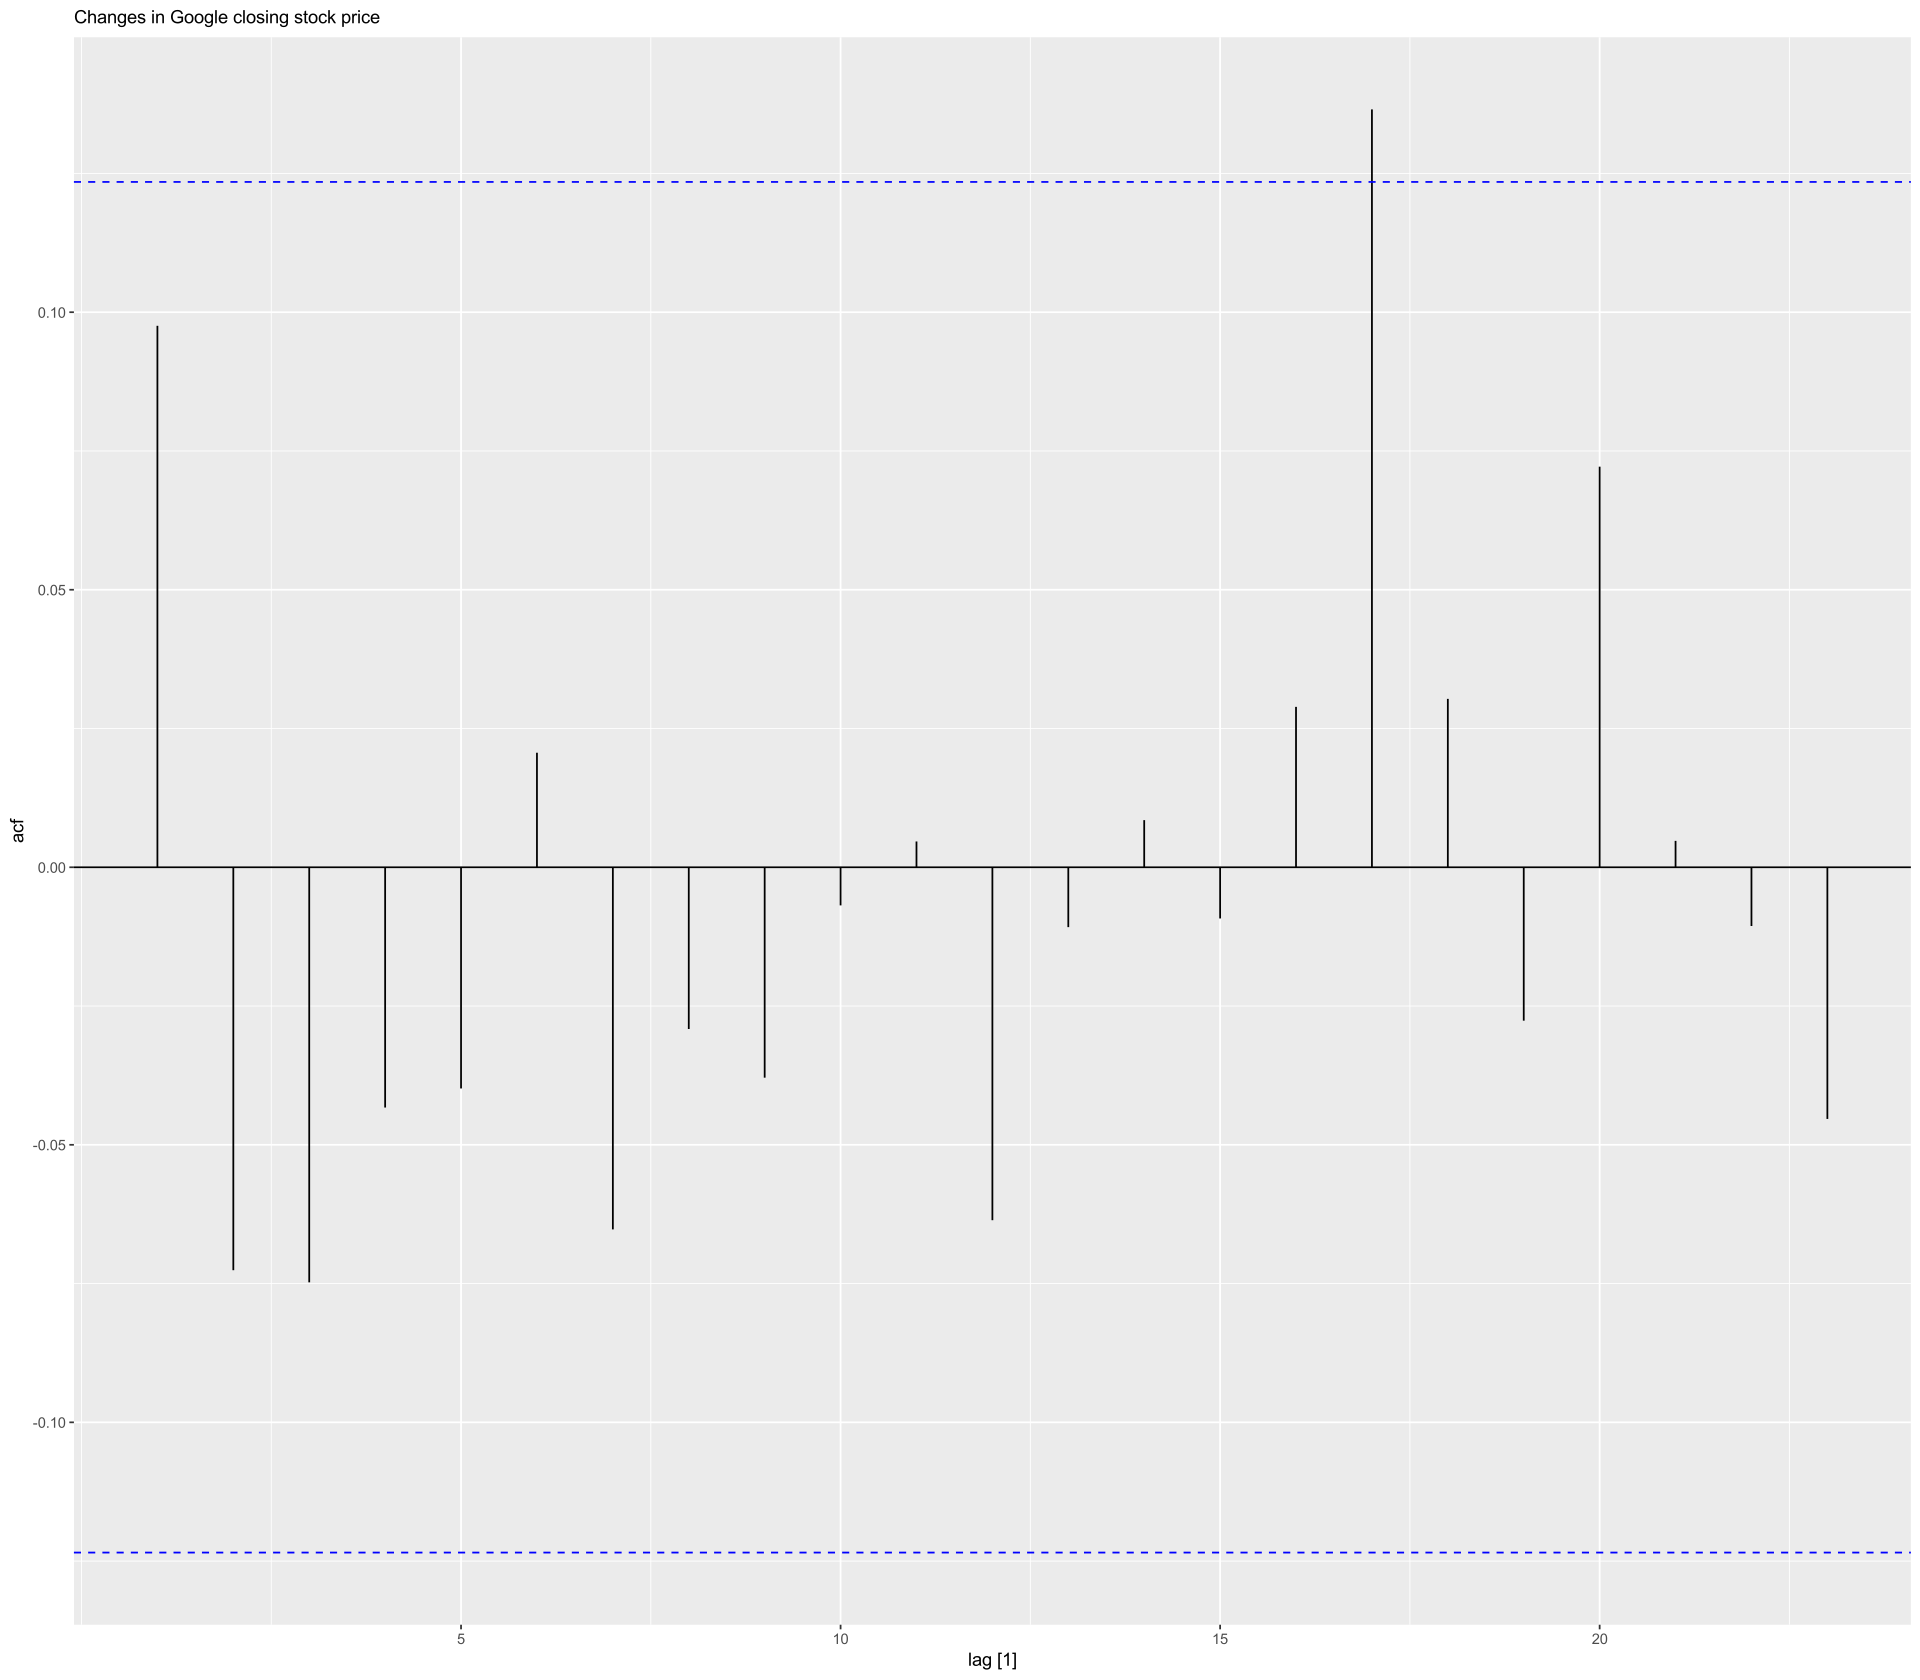

In [6]:
# Now differencing 

google_2015|> ACF(difference(Close)) |> autoplot() + labs(subtitle = "Changes in Google closing stock price")

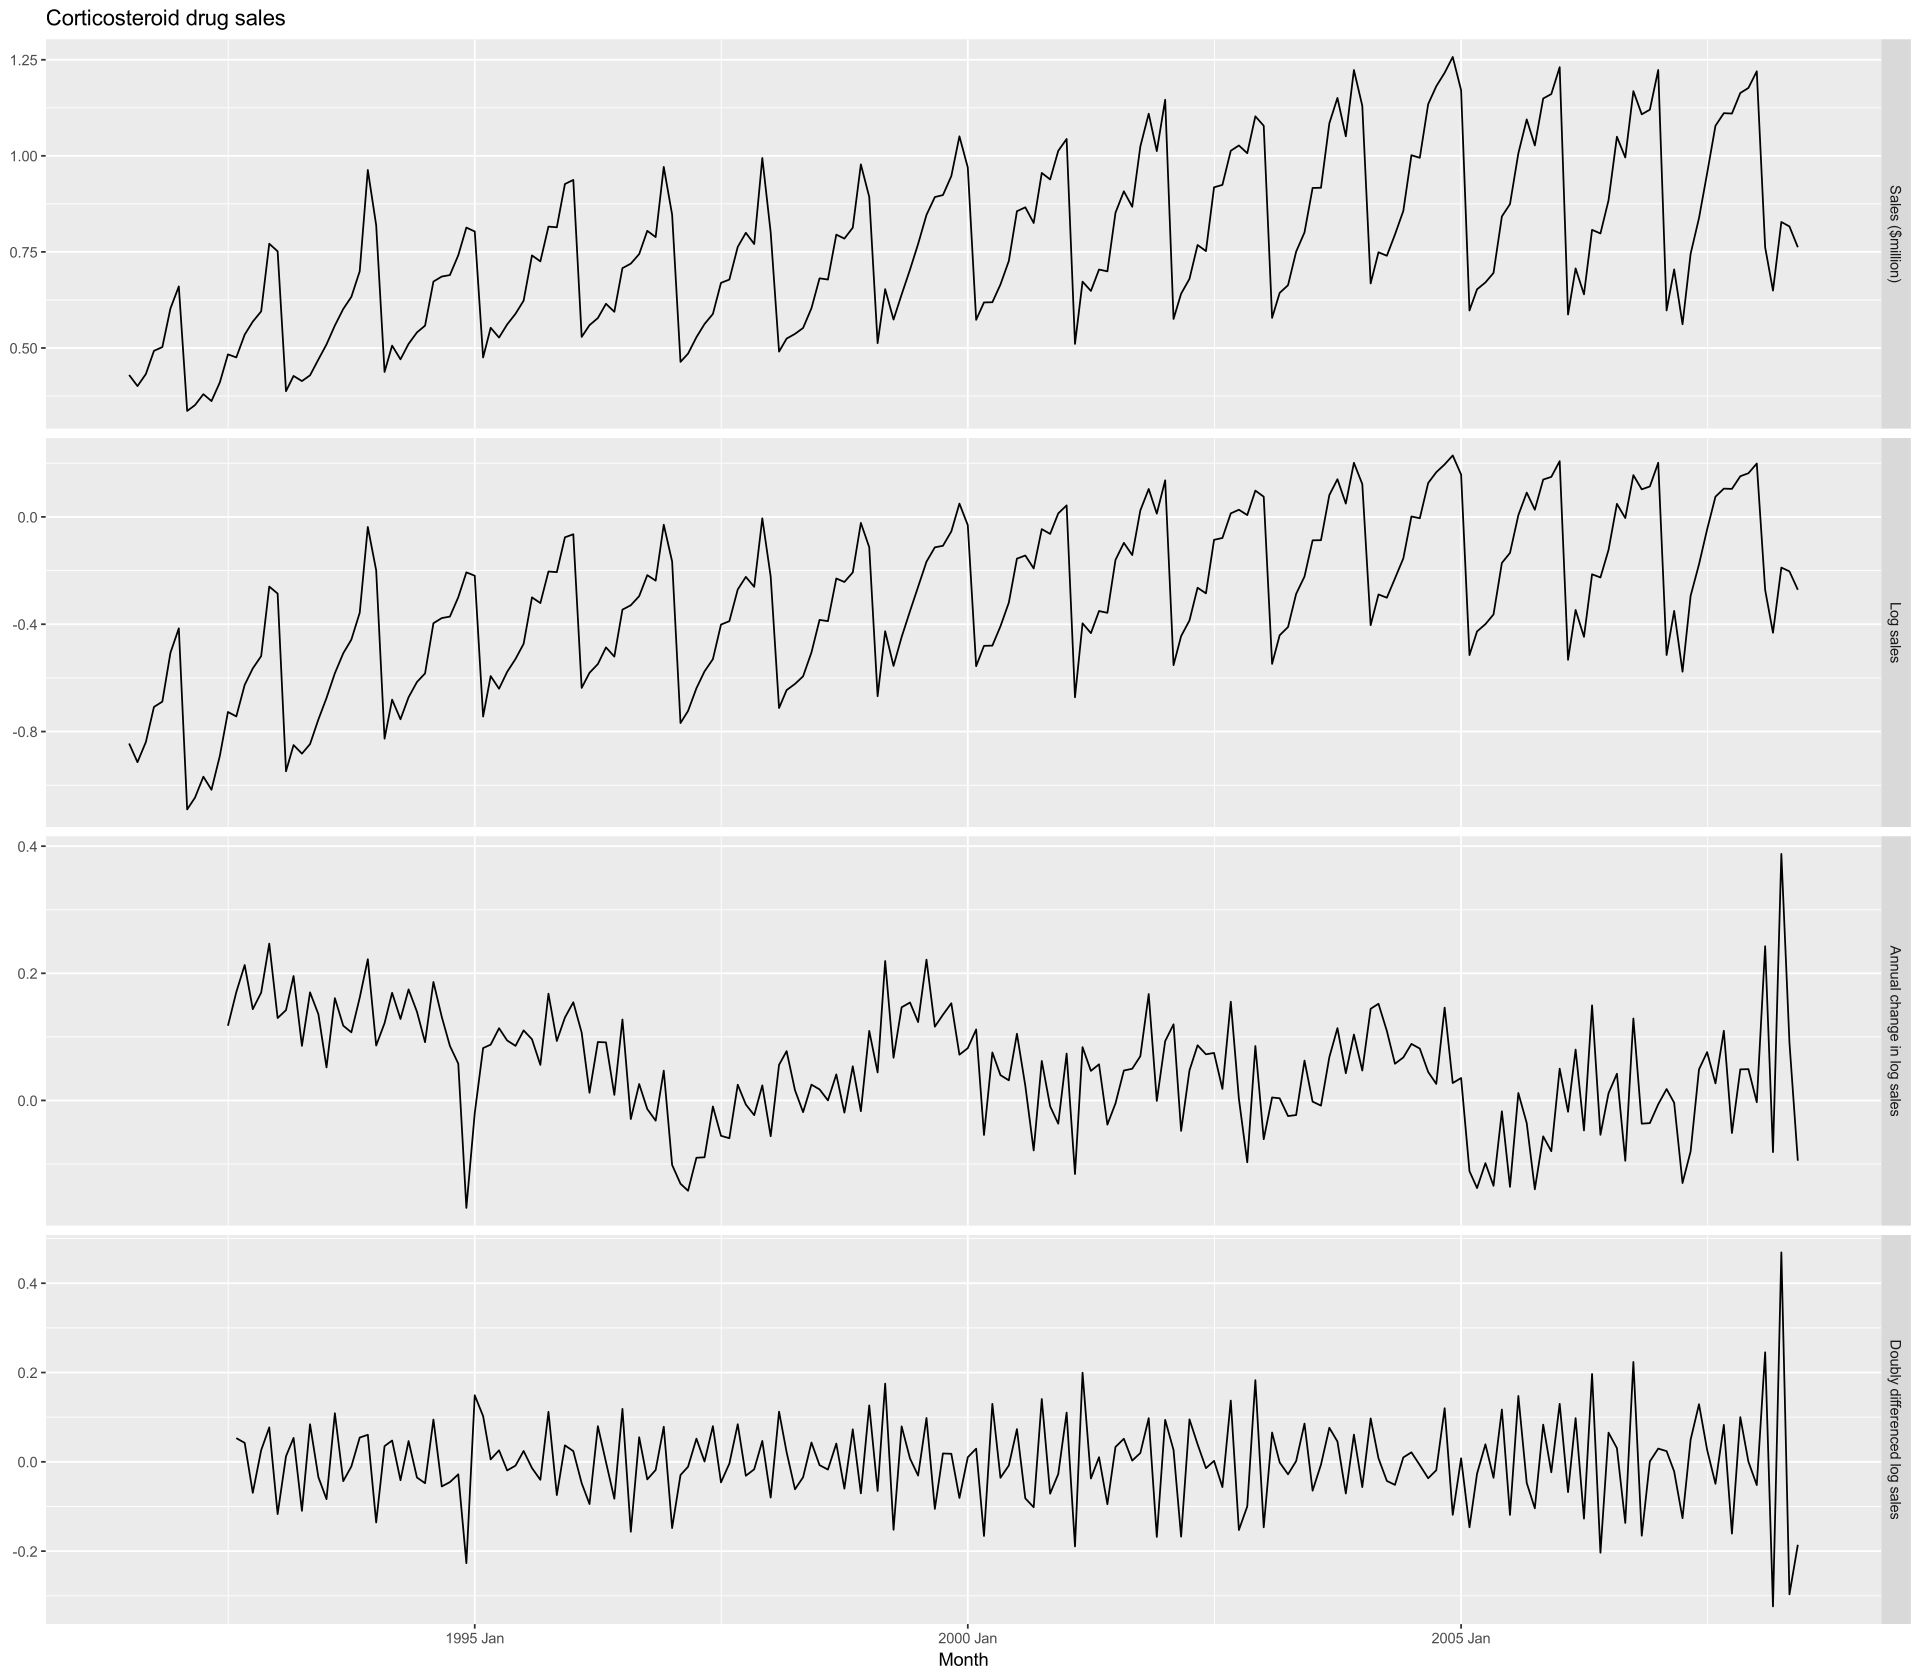

In [7]:
PBS |>
  filter(ATC2 == "H02") |>
  summarise(Cost = sum(Cost)/1e6) |>
  transmute(
    `Sales ($million)` = Cost,
    `Log sales` = log(Cost),
    `Annual change in log sales` = difference(log(Cost), 12),
    `Doubly differenced log sales` =
                     difference(difference(log(Cost), 12), 1)
  ) |>
  pivot_longer(-Month, names_to="Type", values_to="Sales") |>
  mutate(
    Type = factor(Type, levels = c(
      "Sales ($million)",
      "Log sales",
      "Annual change in log sales",
      "Doubly differenced log sales"))
  ) |>
  ggplot(aes(x = Month, y = Sales)) +
  geom_line() +
  facet_grid(vars(Type), scales = "free_y") +
  labs(title = "Corticosteroid drug sales", y = NULL)

In [8]:
install.packages("urca", dependencies = TRUE)

Warning message in install.packages("urca", dependencies = TRUE):
“installation of package ‘urca’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [9]:
# Perform certain tests to ascertain the need of differencing 

google_2015|> features(Close, unitroot_kpss)

Warning message:
“1 error encountered for feature 1
[1] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”


Symbol
<chr>
GOOG


In [10]:
google_2015 |> features(Close, unitroot_ndiffs)

Warning message:
“1 error encountered for feature 1
[1] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”


Symbol
<chr>
GOOG


In [11]:
aus_total_retail <- aus_retail |>
  summarise(Turnover = sum(Turnover))
aus_total_retail |>
  mutate(log_turnover = log(Turnover)) |>
  features(log_turnover, unitroot_nsdiffs)
#> # A tibble: 1 × 1
#>   nsdiffs
#>     <int>
#> 1       1

aus_total_retail |>
  mutate(log_turnover = difference(log(Turnover), 12)) |>
  features(log_turnover, unitroot_ndiffs)
#> # A tibble: 1 × 1
#>   ndiffs
#>    <int>
#> 1      1

nsdiffs
<int>
1


Warning message:
“1 error encountered for feature 1
[1] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”


1

9.2 Backshift notation

9.3 Autoregressive models

9.5 Non seasonal ARIMA

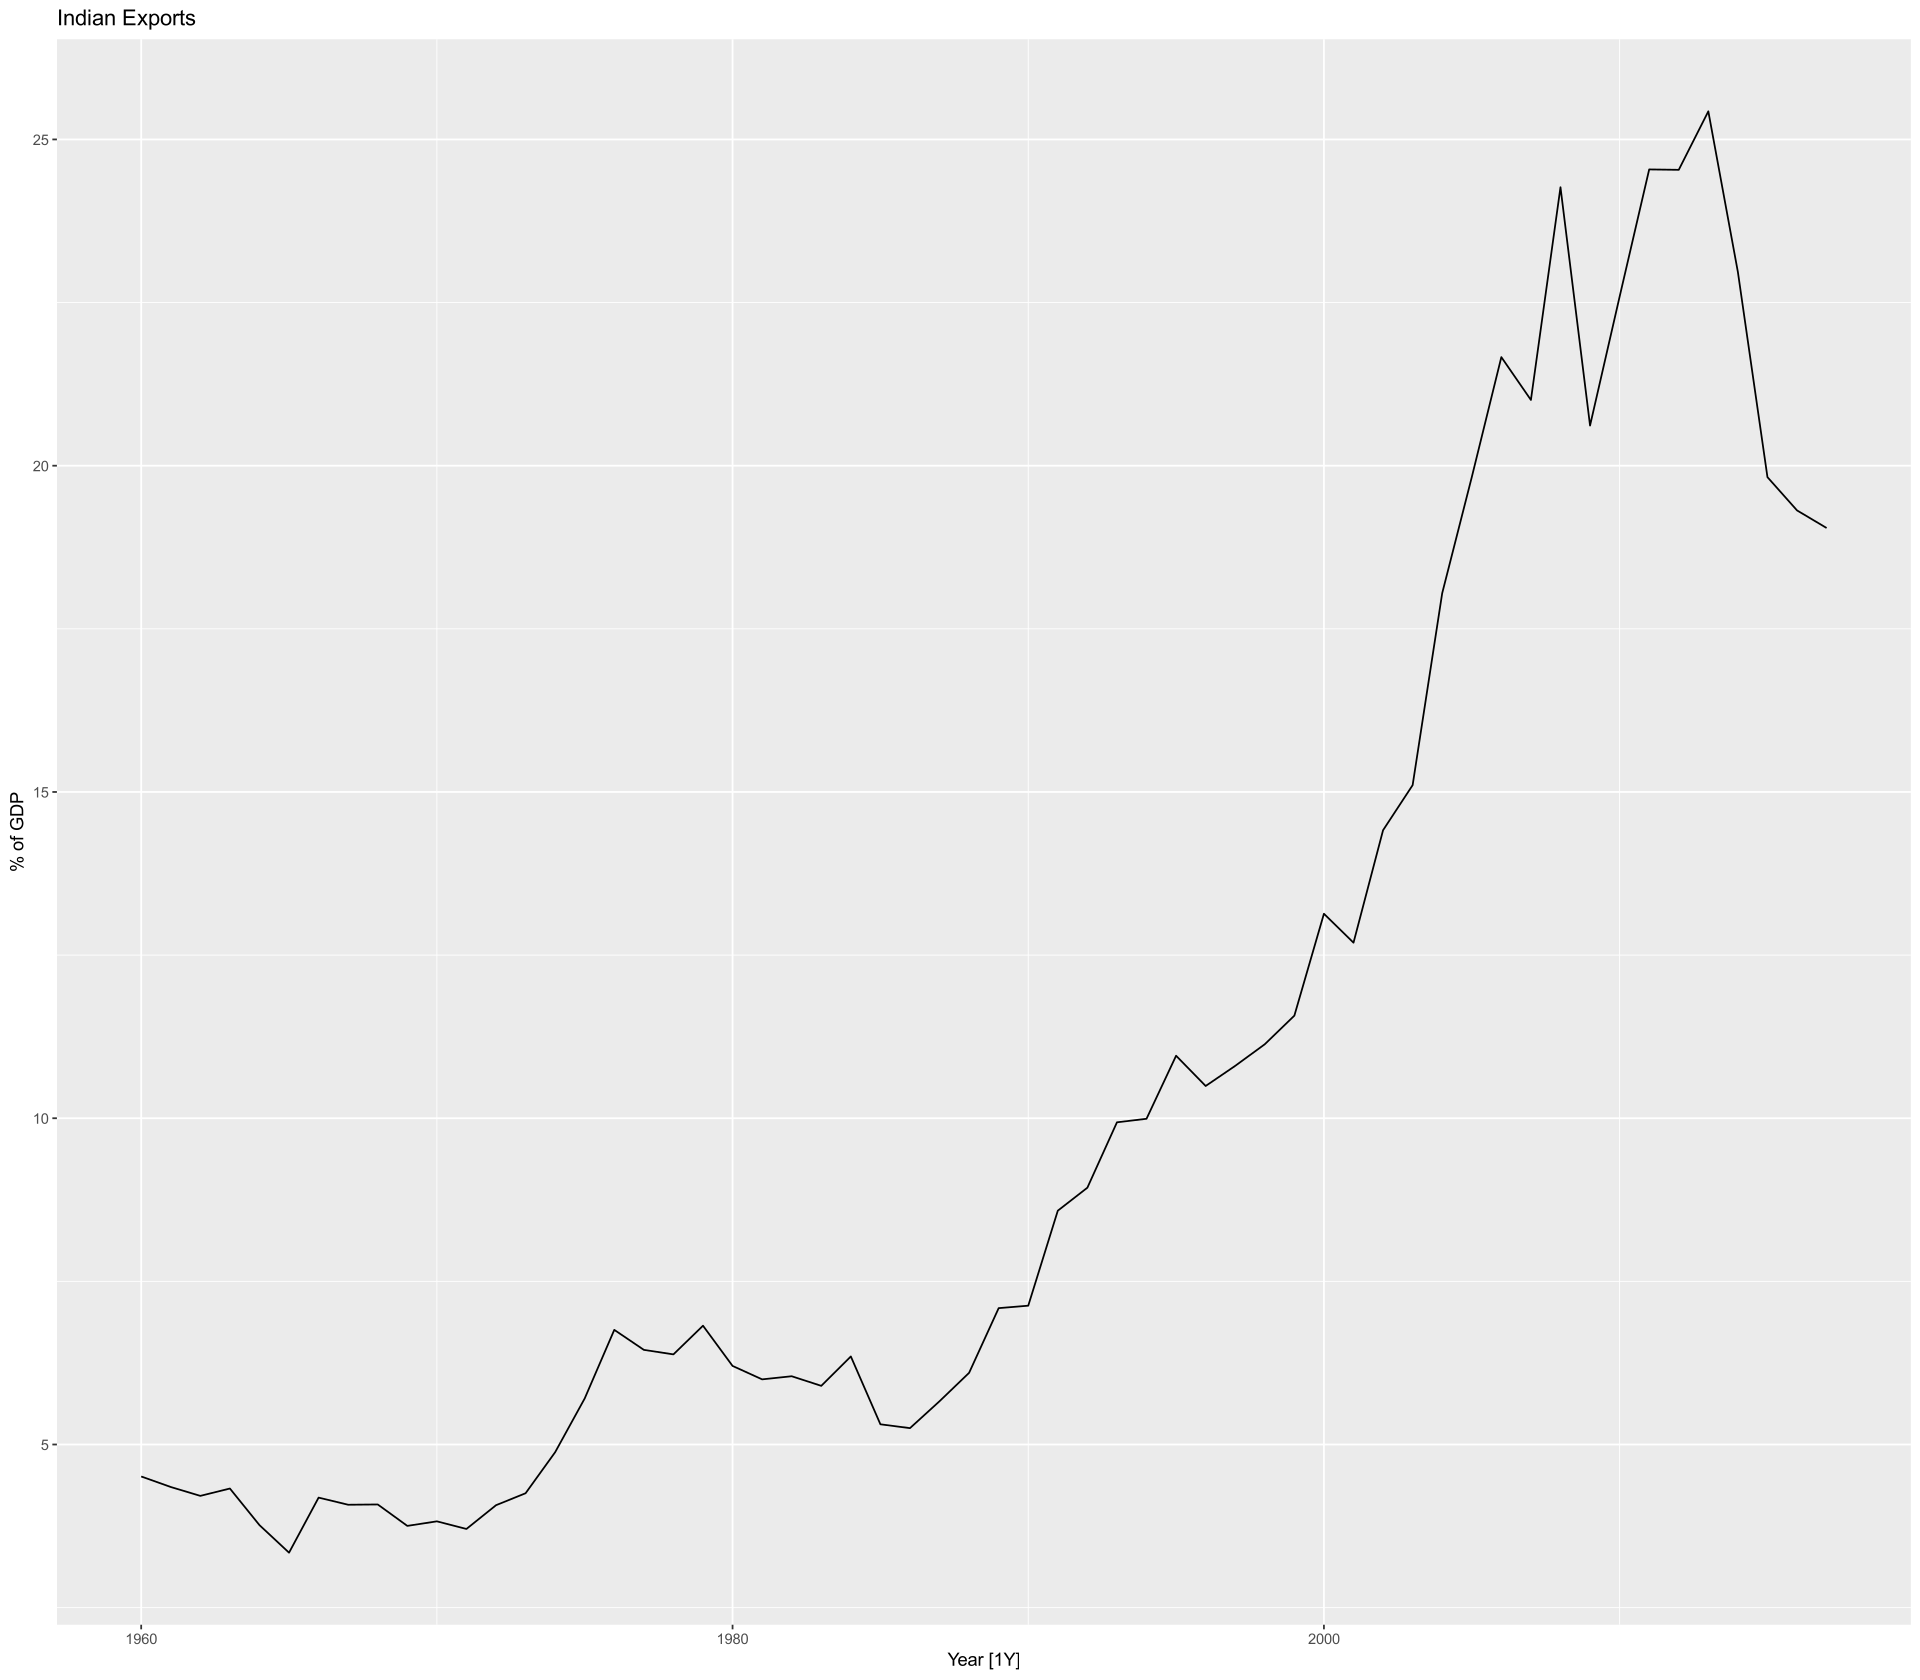

In [12]:
global_economy |>filter(Code == "IND") |> autoplot(Exports) + labs(y  = "% of GDP", title = "Indian Exports")

In [13]:
install.packages("urca", repos = "http://cran.rstudio.com/")

Warning message in install.packages("urca", repos = "http://cran.rstudio.com/"):
“installation of package ‘urca’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [14]:
# The following R code selects a seasonal ARIMA model automatically

fit <- global_economy|>filter(Code == "IND")|>model(ARIMA(Exports))

Warning message:
“1 error encountered for ARIMA(Exports)
[1] The `urca` package must be installed to use this functionality. It can be installed with install.packages("urca")
”


In [15]:
fit

Country,ARIMA(Exports)
<fct>,<model>
India,<NULL model>


Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”
Warning message:
“Removed 10 rows containing missing values (`()`).”


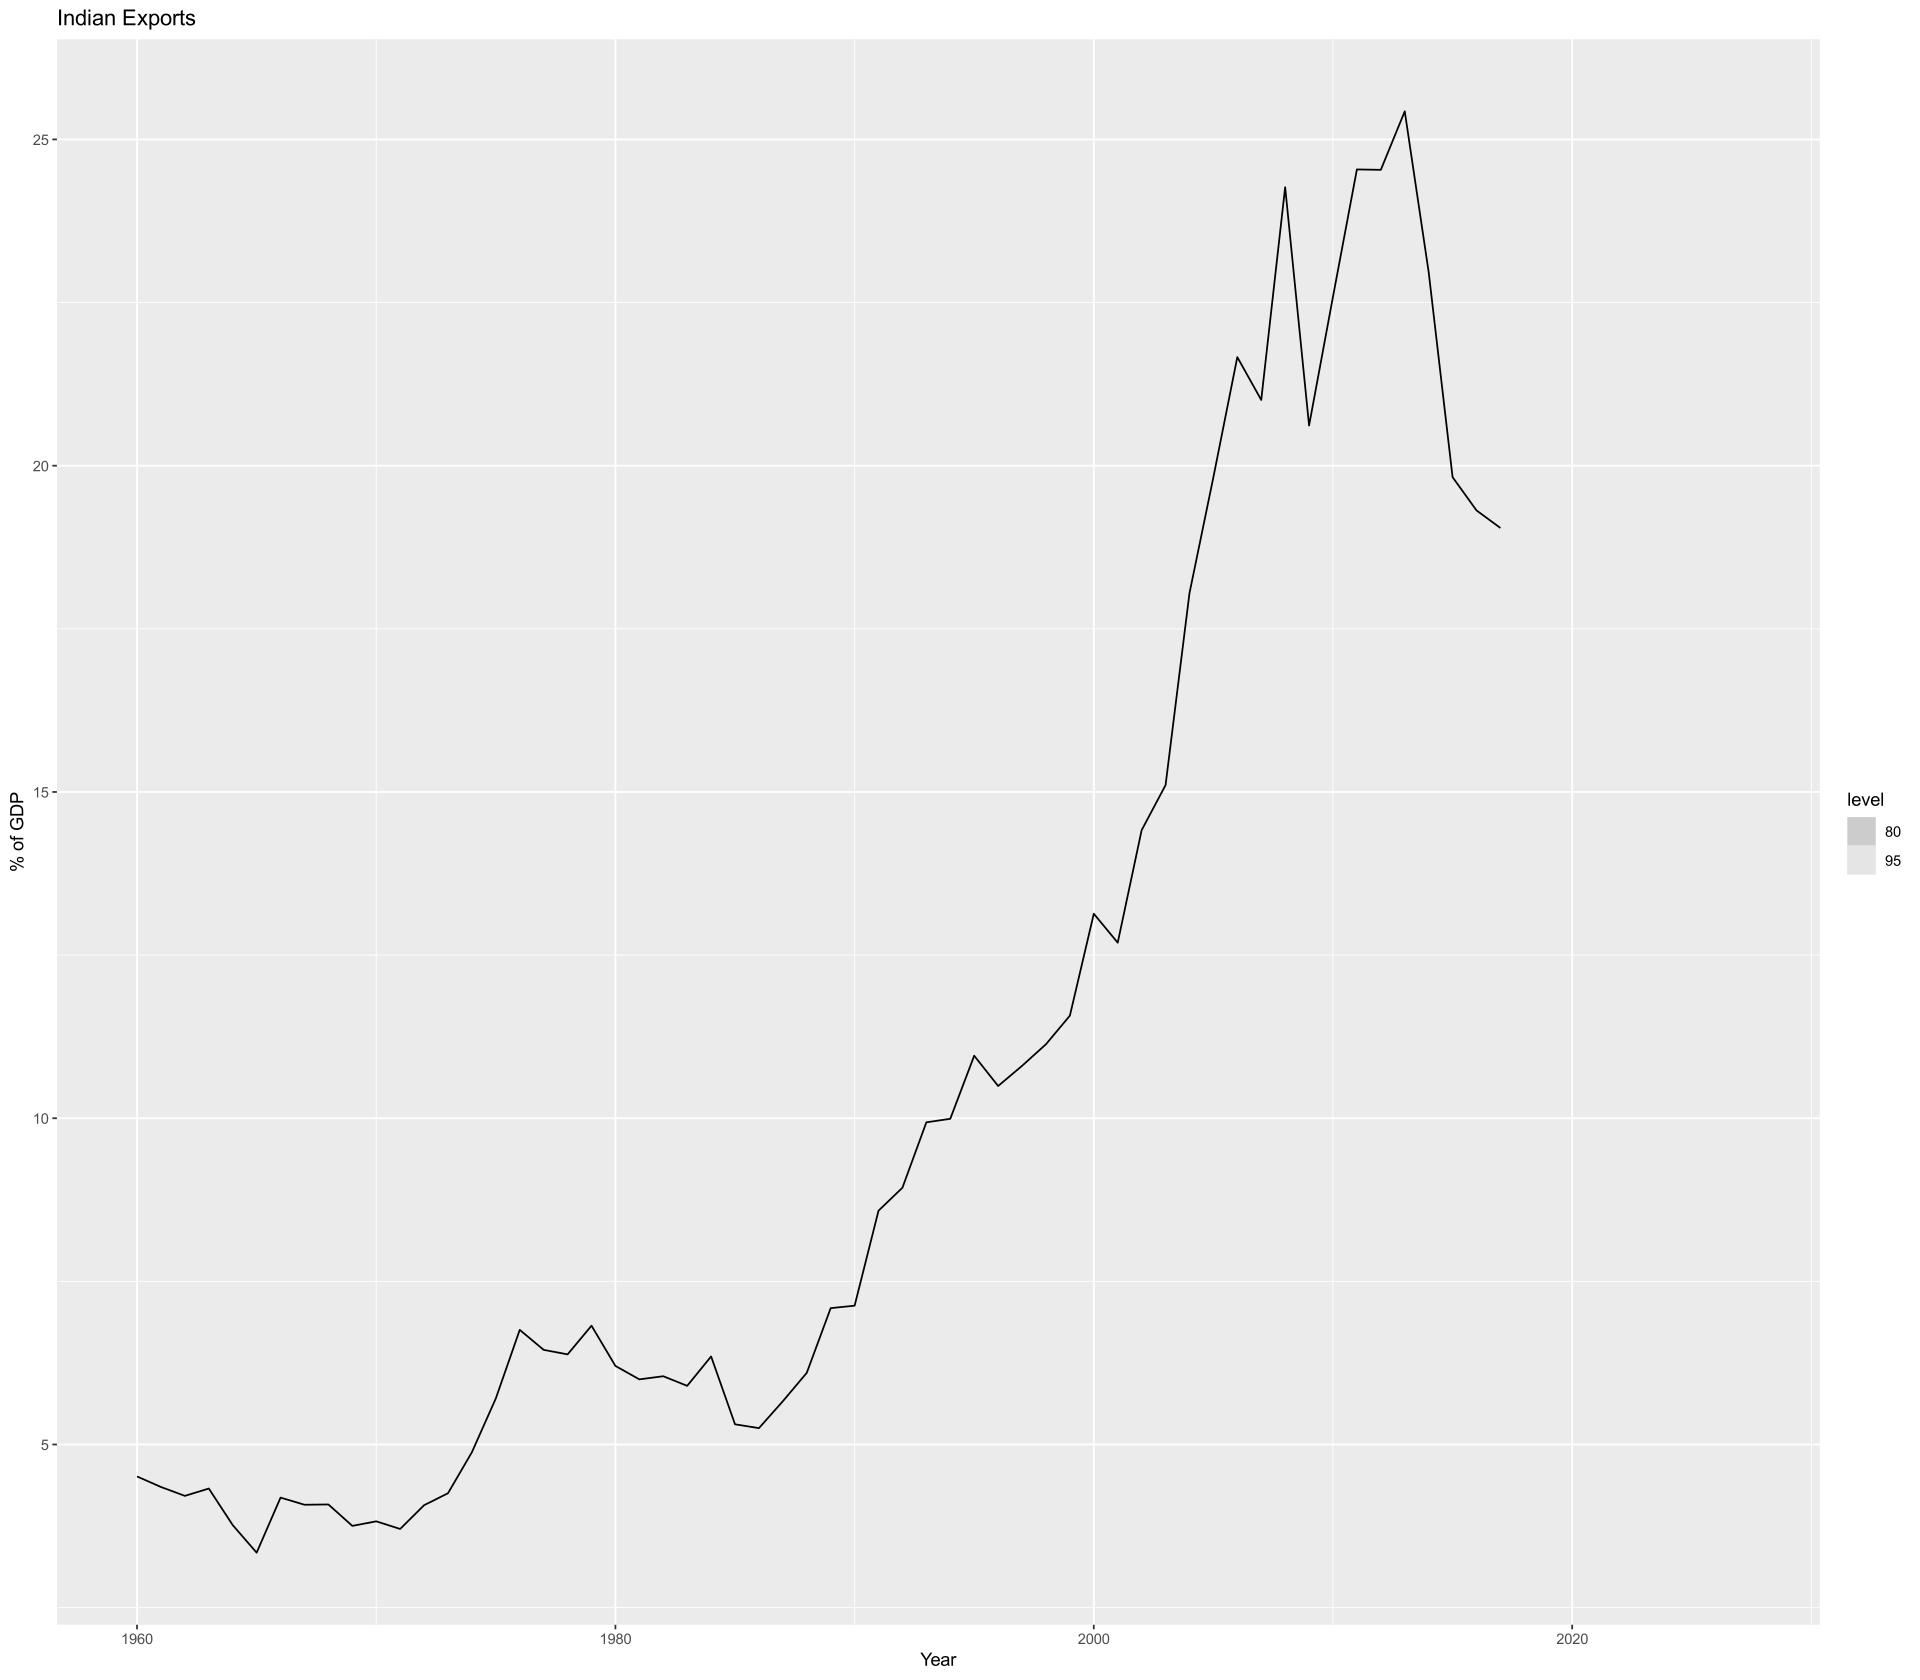

In [16]:
# forecast

fit |>forecast(h=10)|>autoplot(global_economy) + labs(y = "% of GDP", title = "Indian Exports")

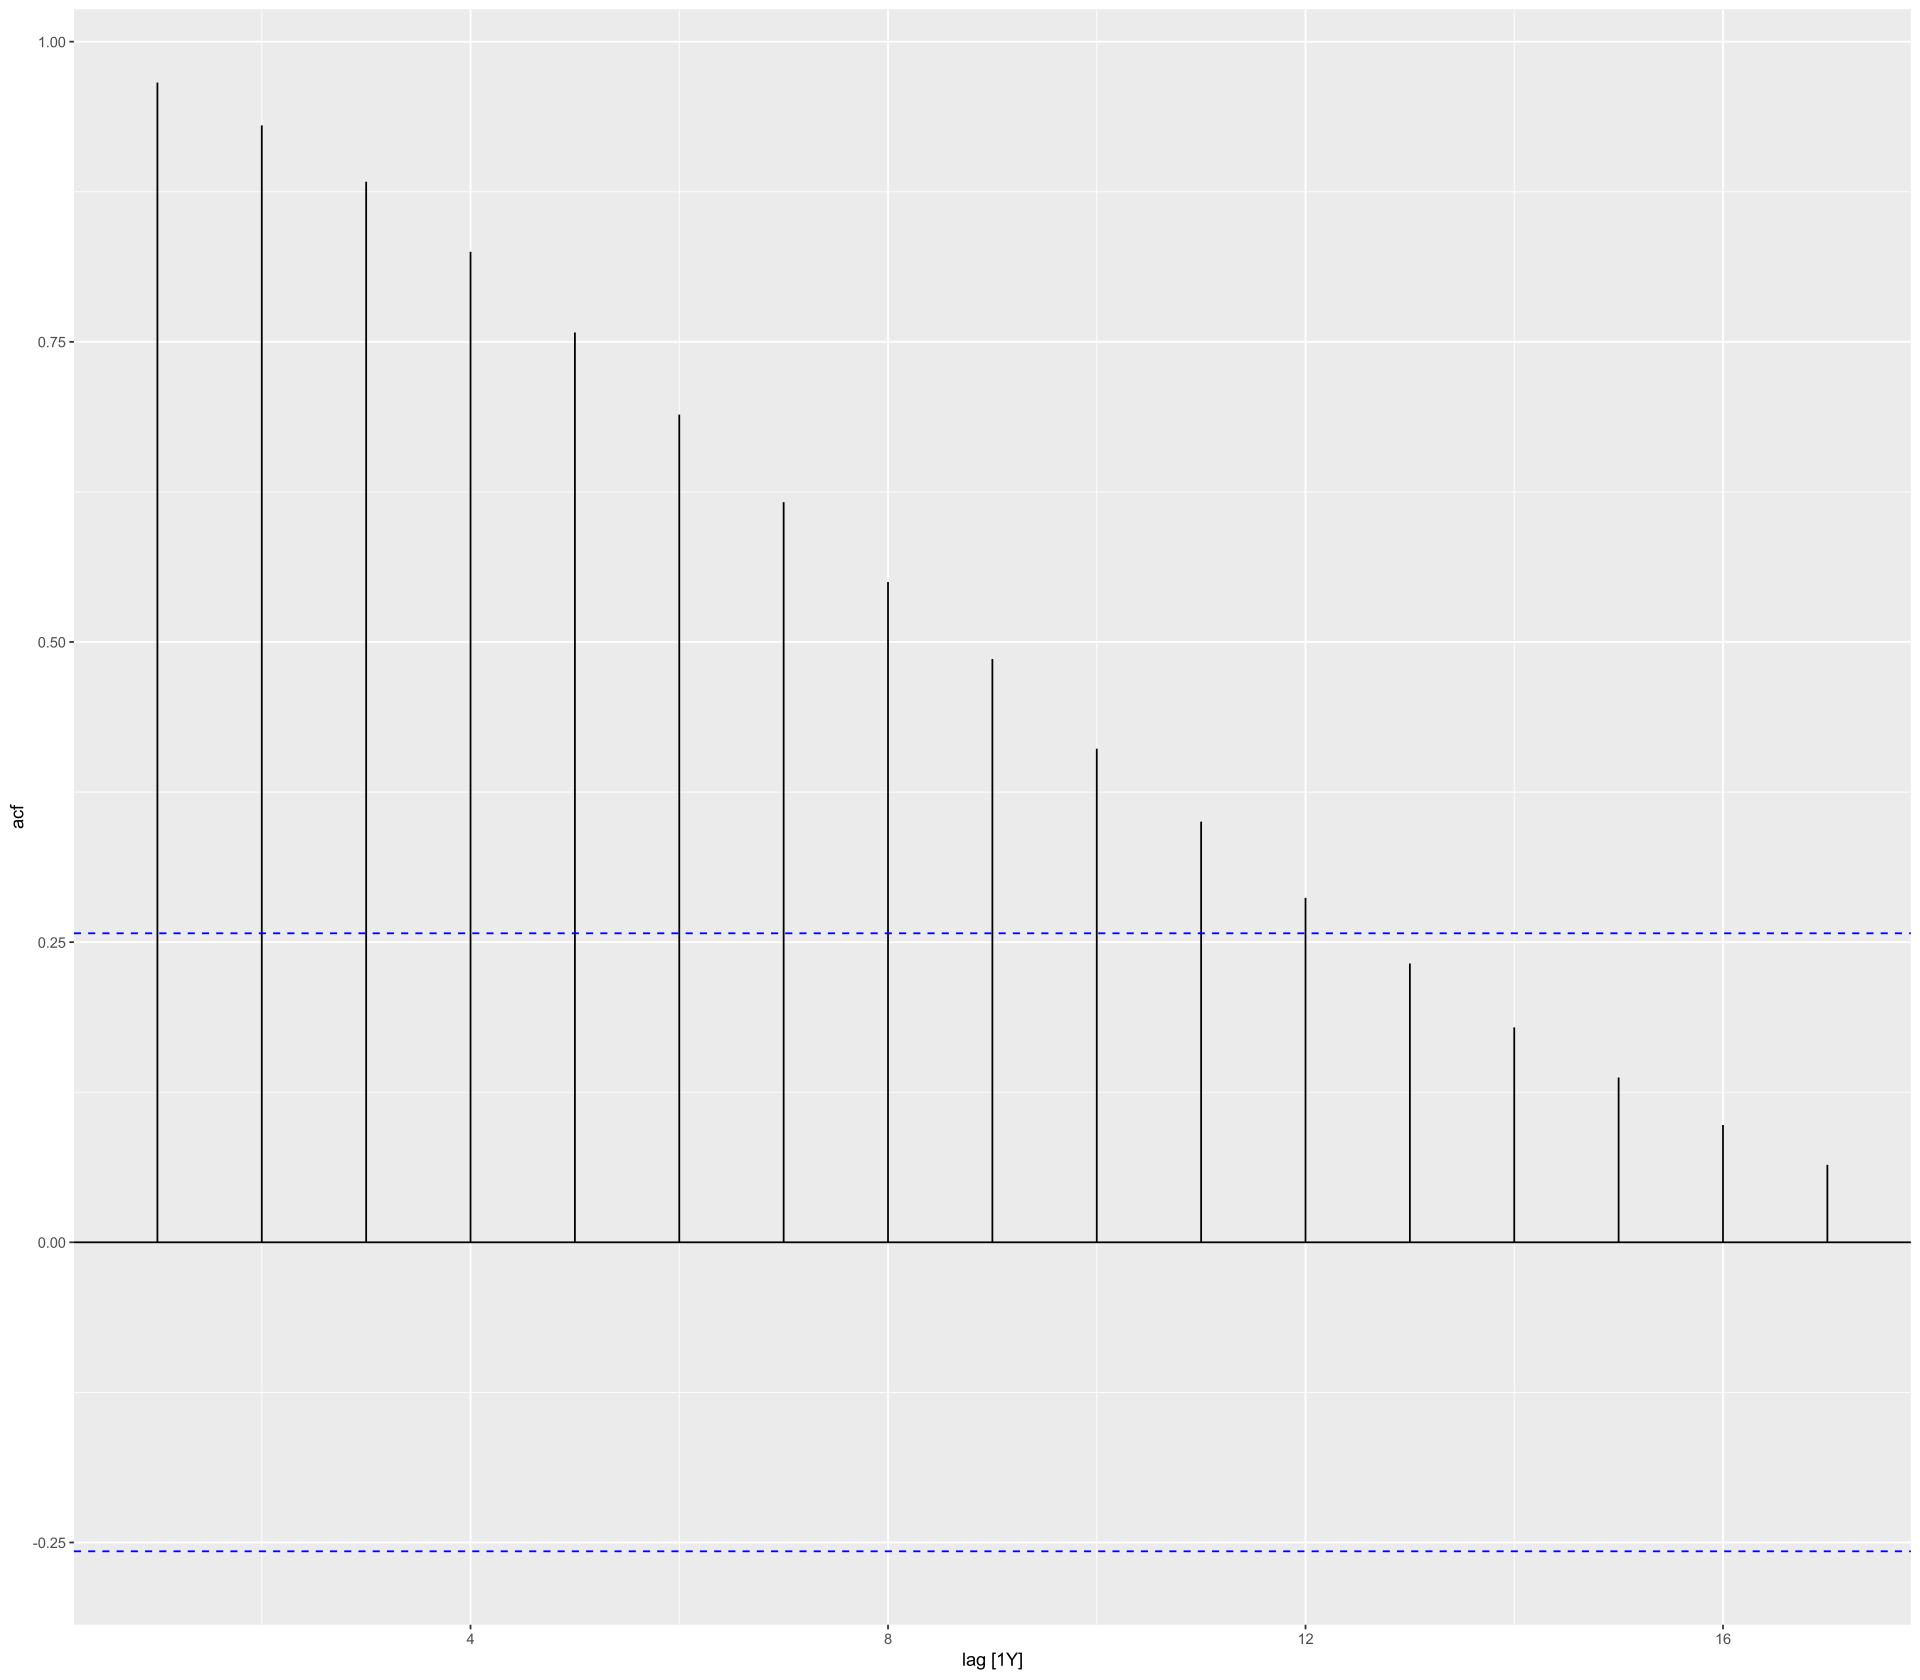

In [17]:
global_economy|>filter(Code == "IND")|>ACF(Exports)|>autoplot()

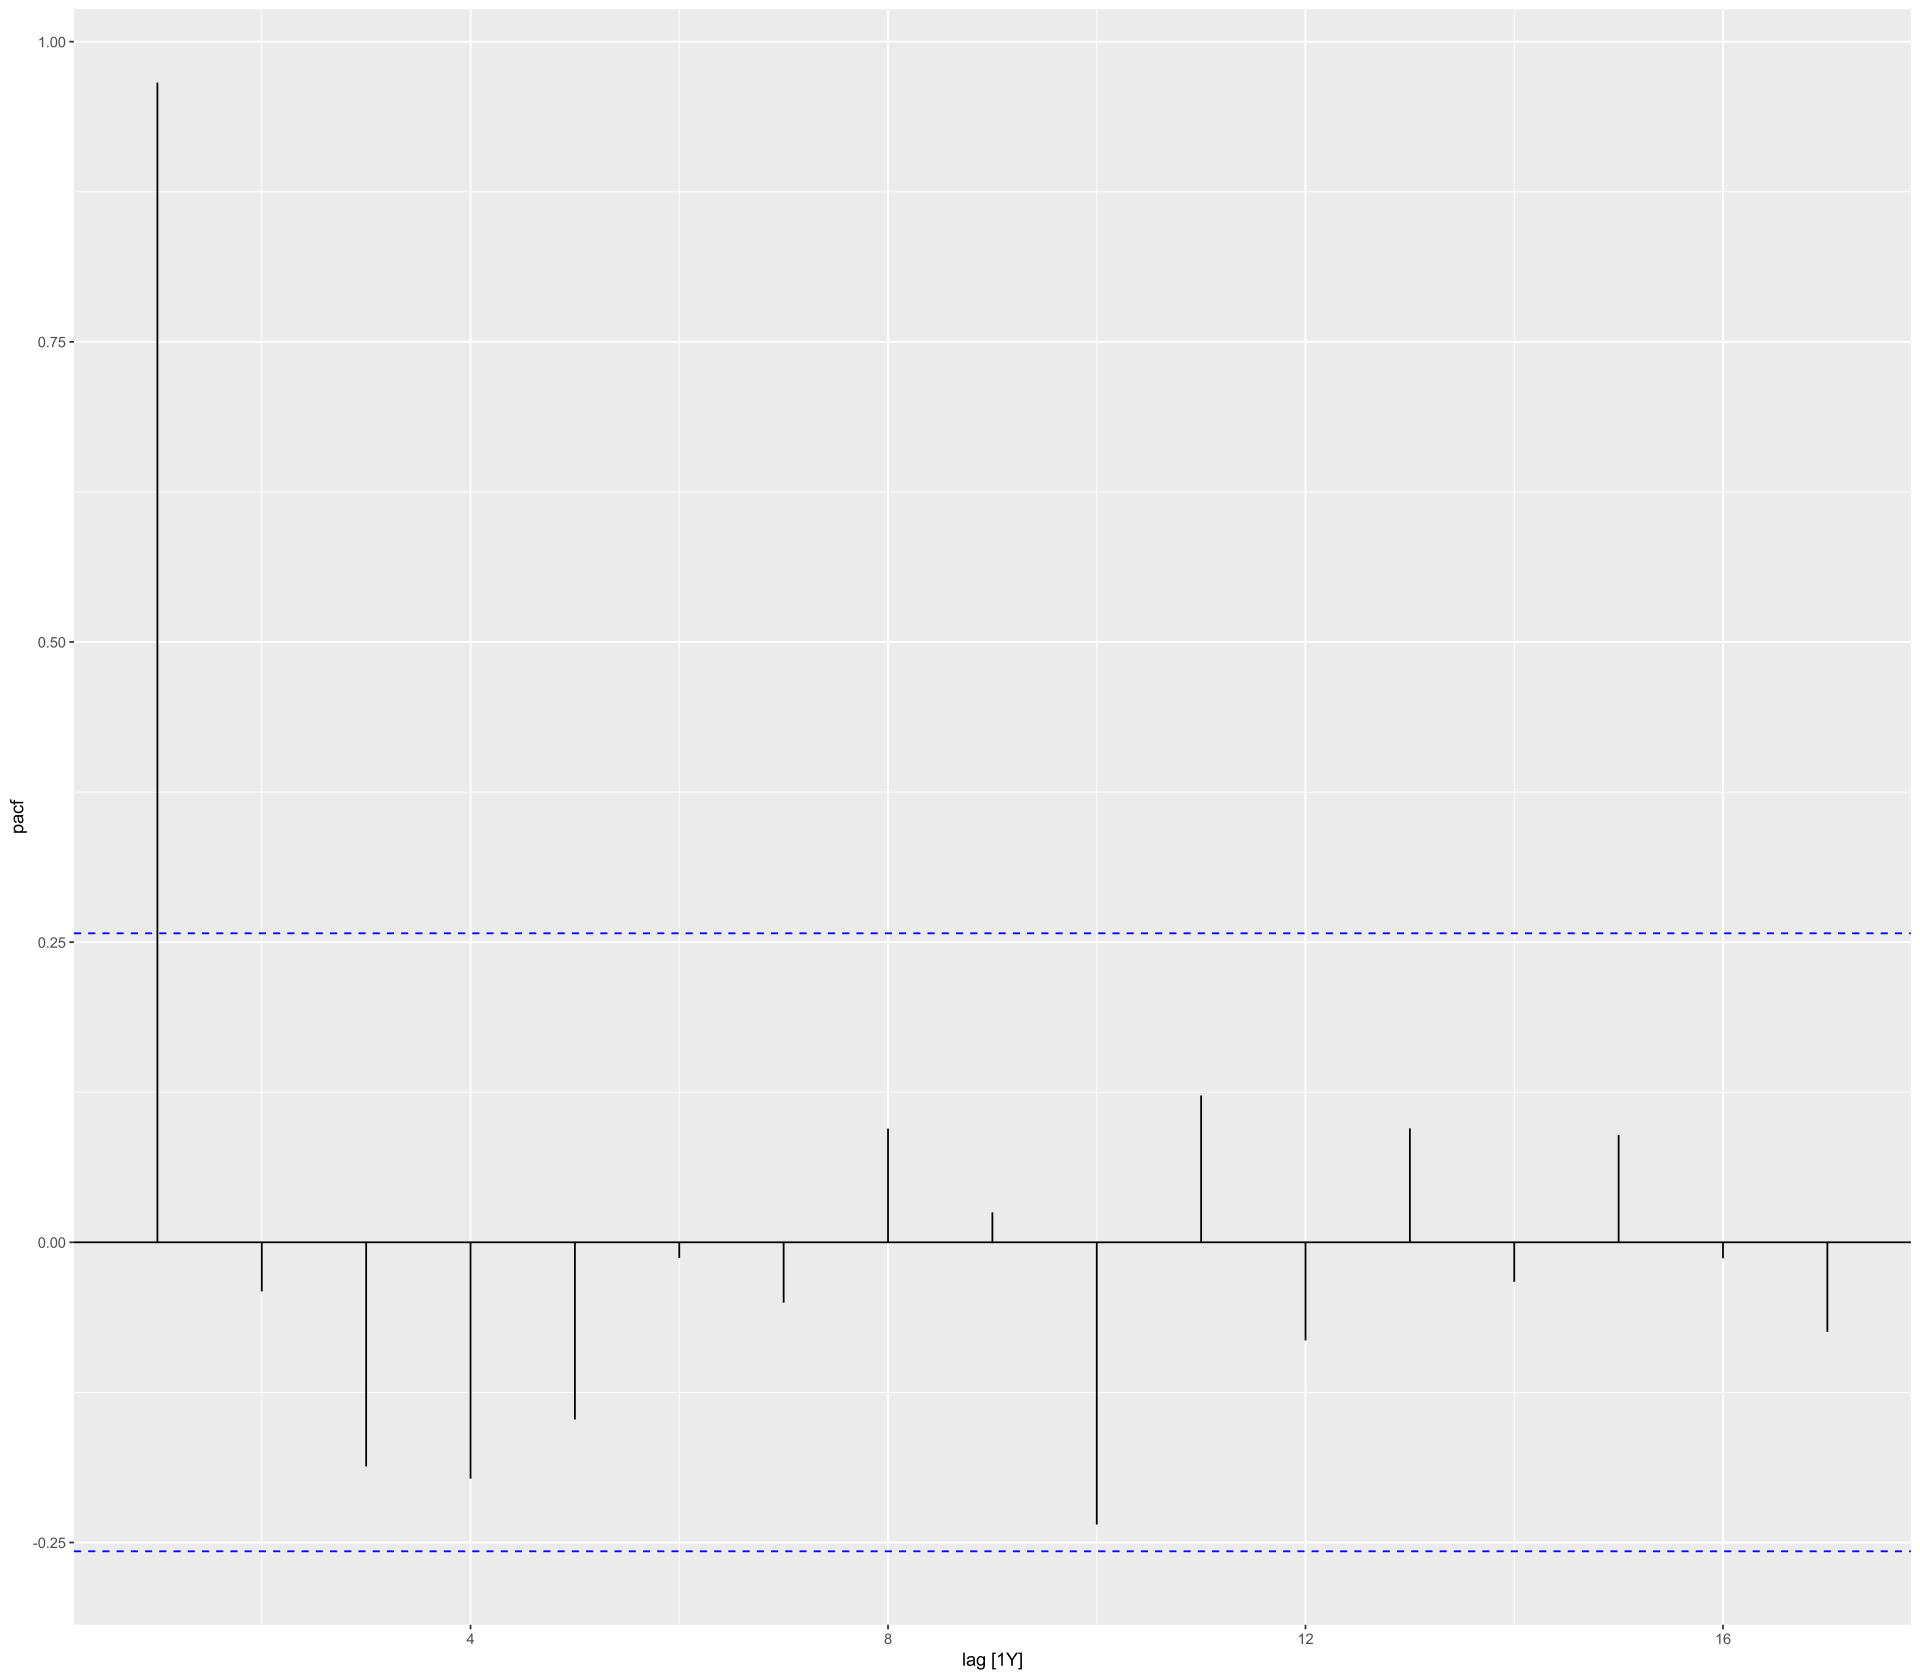

In [18]:
global_economy |>filter(Code == "IND")|>PACF(Exports)|>autoplot()

In [19]:
# Check if the package is installed
if (!requireNamespace("urca", quietly = TRUE)) {
  # If not installed, install it
  install.packages("urca")
} else {
  # If installed, load the package
  library(urca)
}


Warning message in install.packages("urca"):
“installation of package ‘urca’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [20]:
library("tseries")

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [21]:
ARIMA(global_economy|>filter(Code == "IND"), order = c(1,1,1))
adf.test(global_economy|>filter(Code == "IND"), y=Exports)

<ARIMA model definition>

ERROR: Error in adf.test(filter(global_economy, Code == "IND"), y = Exports): unused argument (y = Exports)


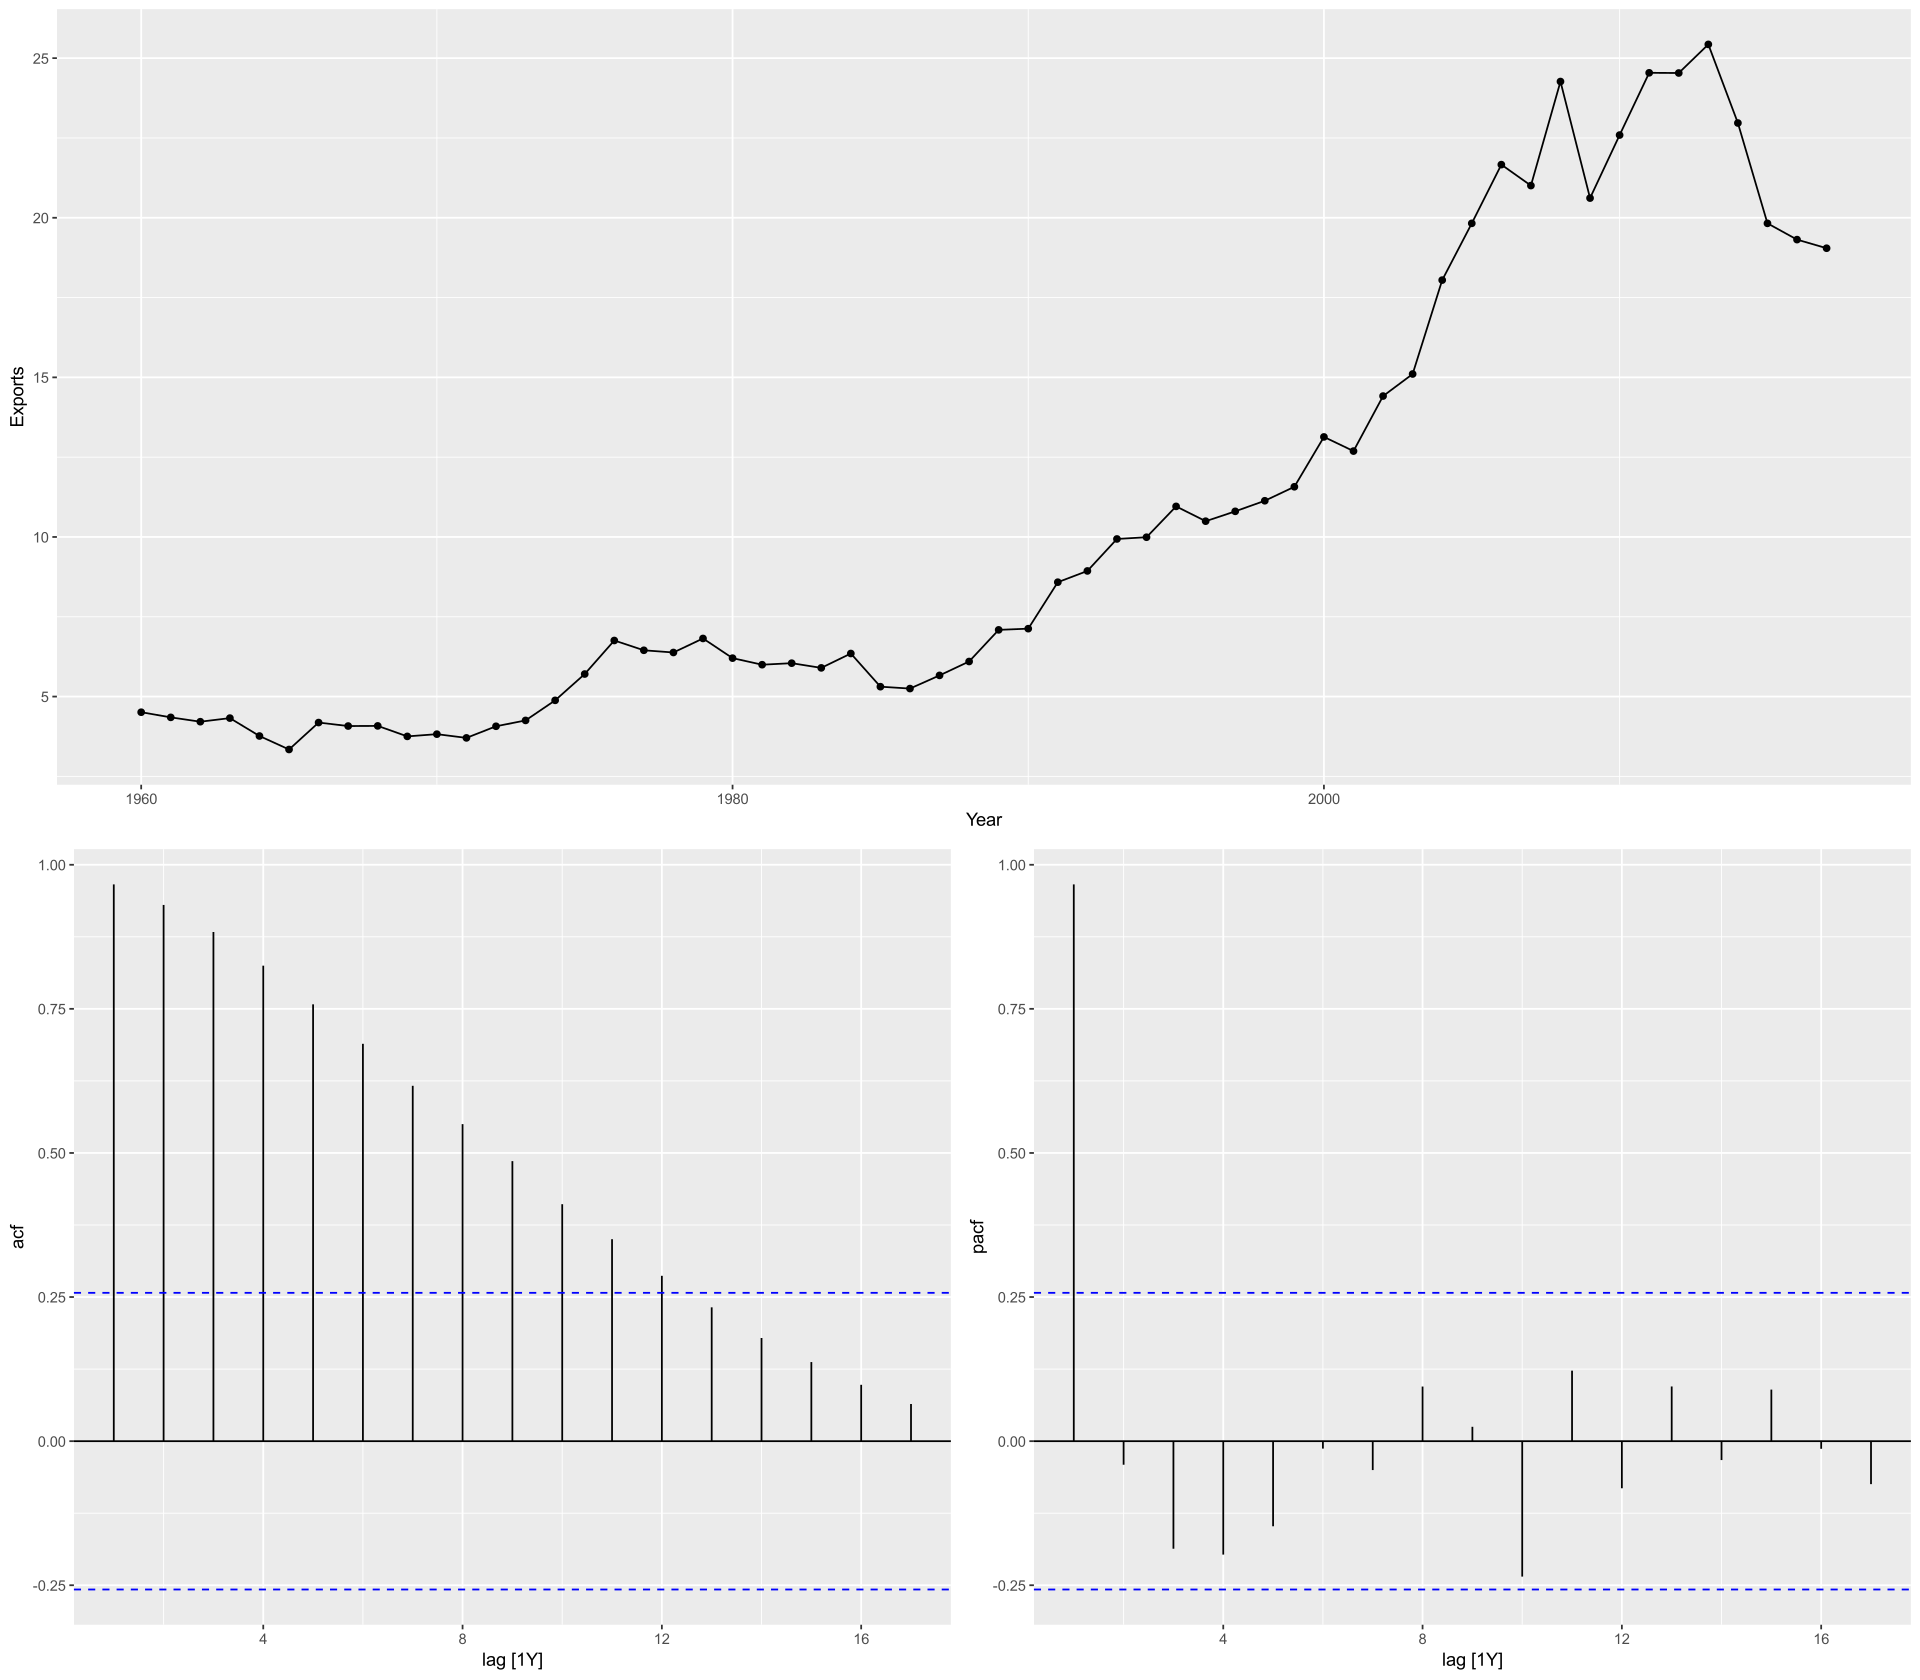

In [22]:
gg_tsdisplay(global_economy|>filter(Code == "IND"),y = Exports, plot_type = "partial")

In [23]:
# Key points about the ACF and PACF from the above plots

# The data may follow an ARIMA(p,d,0) model if the ACF and PACF plots of the differenced data show the following patterns:

# The ACF is exponentially decaying or sinusoidal
# Ther is a significant spike at lag p in the PACF, but noen beyond lag p.

# The data may follow an ARIMA(0,d,q) model if the ACF and PACF plots of the differenced data show the following patterns:

# The ACF is exponentially decaying or sinusoidal
# There is a significant spike at lag q in the PACF, but none beyond lag q.


#

In [24]:
fit2 <- global_economy |> filter(Code == "IND") |> model(ARIMA(Exports ~ pdq(0,2,1)))

In [25]:
fit2

Country,"ARIMA(Exports ~ pdq(0, 2, 1))"
<fct>,<model>
India,"<ARIMA(0,2,1)>"


In [26]:
report(fit2)

Series: Exports 
Model: ARIMA(0,2,1) 

Coefficients:
          ma1
      -0.8621
s.e.   0.1254

sigma^2 estimated as 1.491:  log likelihood=-90.83
AIC=185.65   AICc=185.88   BIC=189.7


In [27]:
# We can also find the best ARIMA model with p {1,2,3,4}, q {0,1,2} and d=1, we can use


fit3 <- global_economy|>filter(Code == 'IND') |>model(ARIMA(Exports ~ pdq( p=1:3, d=1, q=0:2)))

In [28]:
report(fit3)

Series: Exports 
Model: ARIMA(2,1,0) 

Coefficients:
         ar1     ar2
      0.0100  0.3118
s.e.  0.1234  0.1231

sigma^2 estimated as 1.342:  log likelihood=-88.35
AIC=182.71   AICc=183.16   BIC=188.84


In [29]:
fit3 -> forecast(h=10)

ERROR: Error in forecast(h = 10) <- fit3: target of assignment expands to non-language object


9.7 - ARIMA modelling in fable

[[1]]

$y
[1] "% of GDP"

$title
[1] "Indian Exports"

attr(,"class")
[1] "labels"

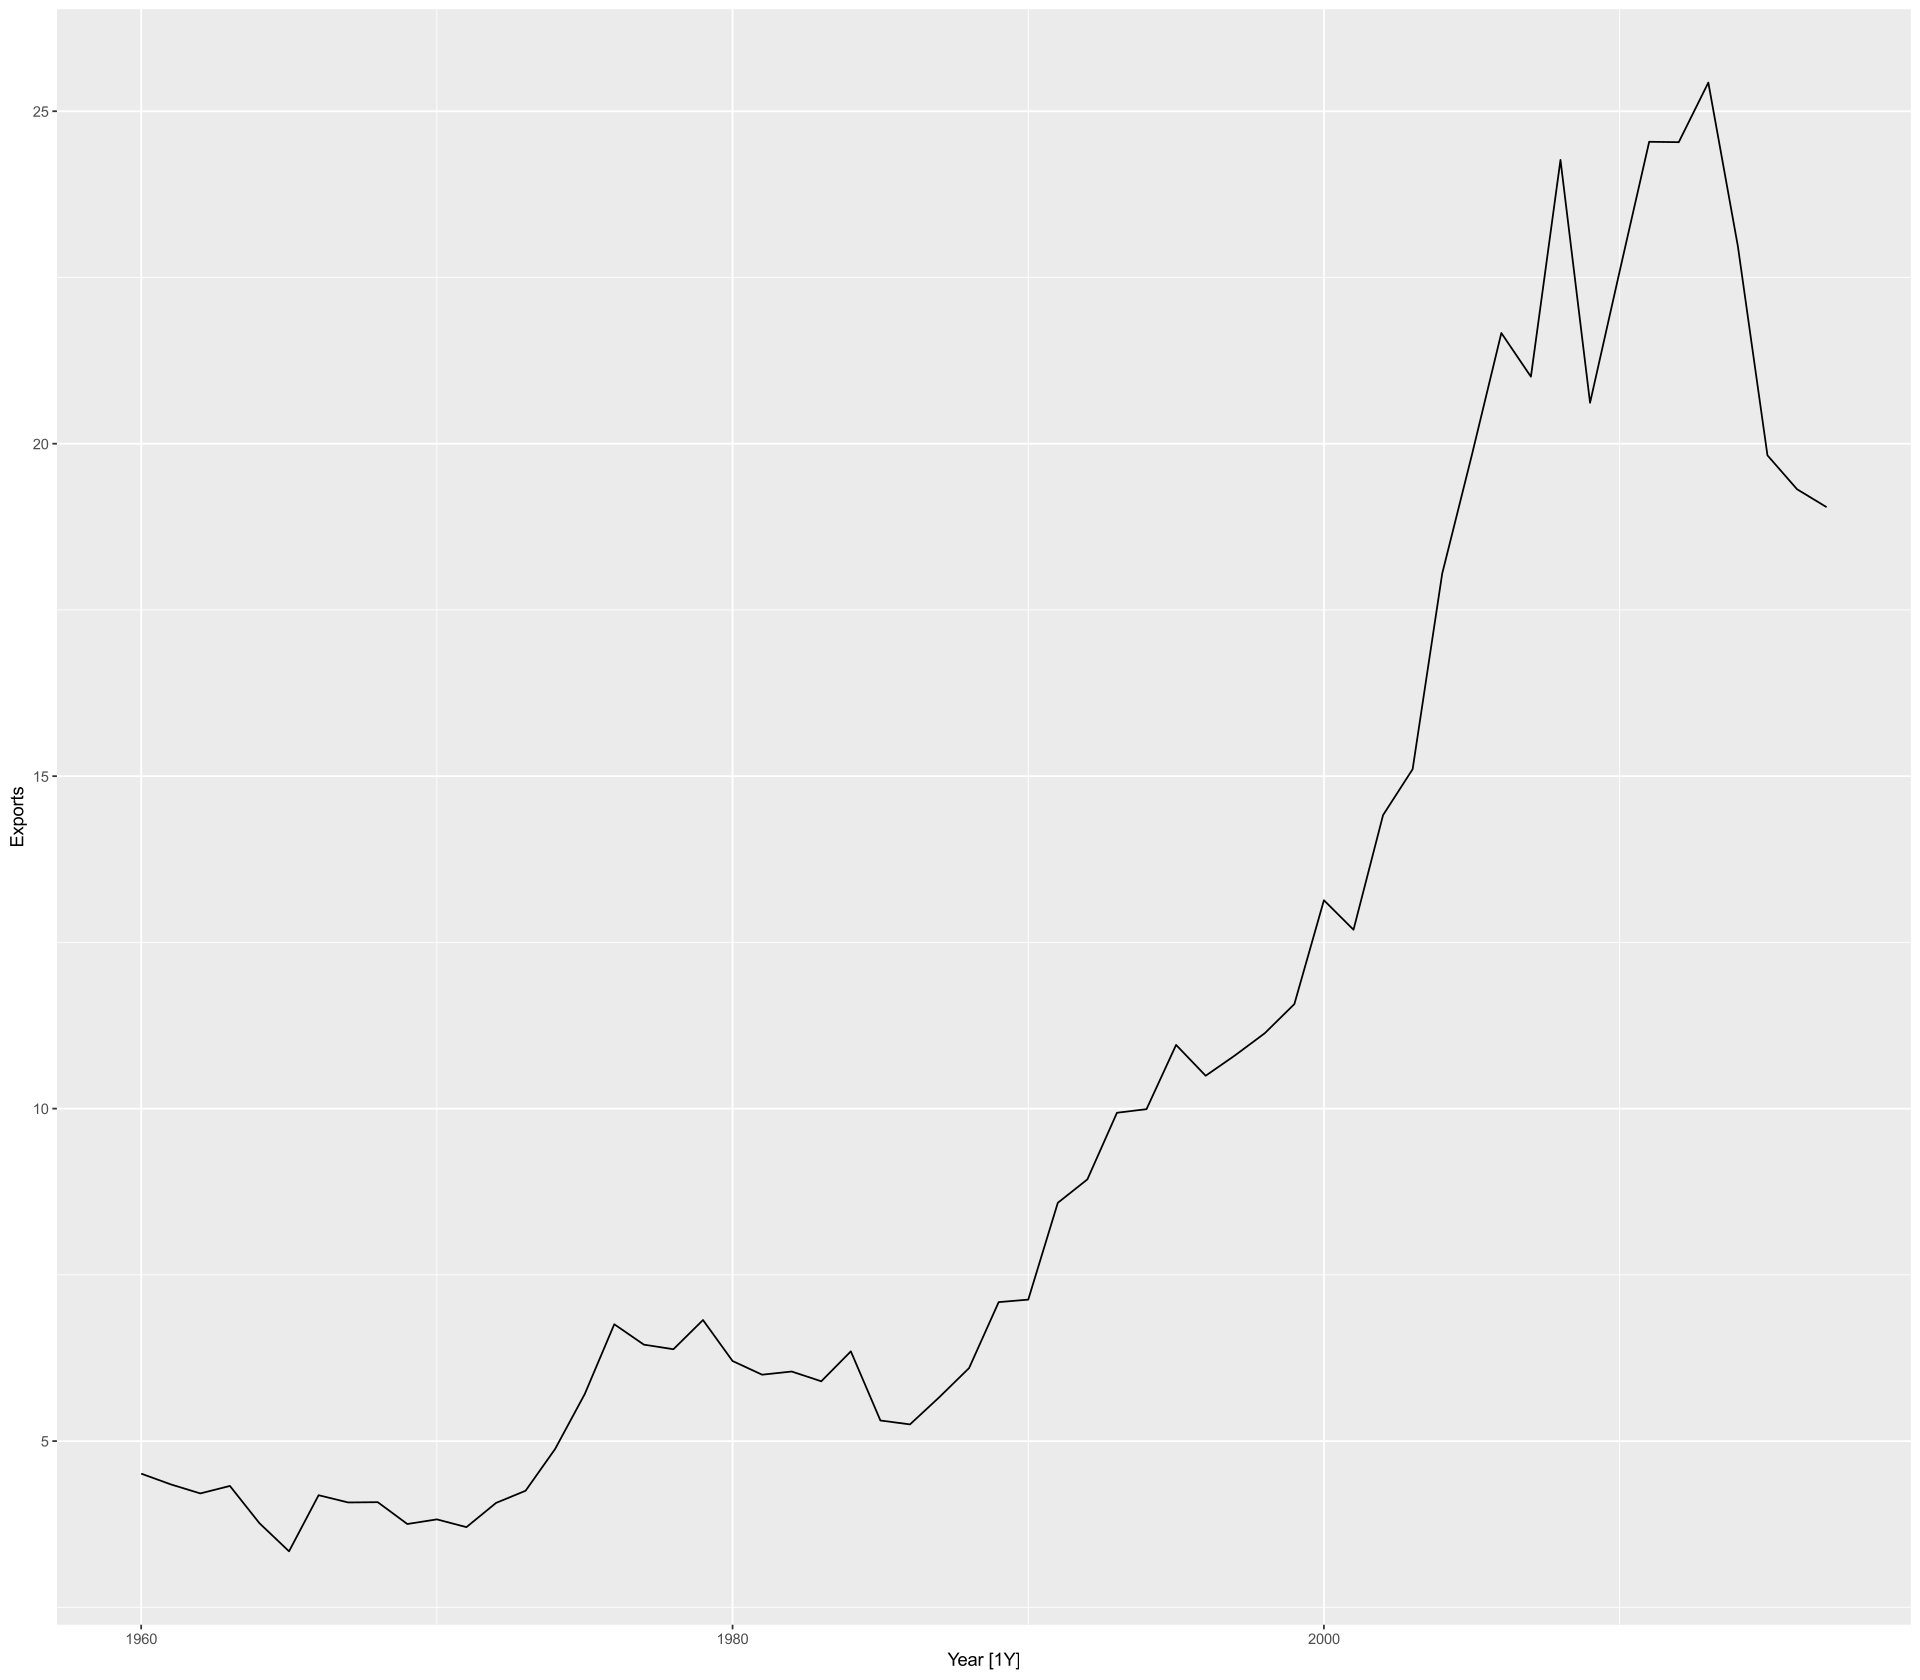

In [30]:
# When fitting an ARIMA model to a set of non-seasonal time series data, the following procedure provides a useful general approach

# Example Indian exports


global_economy |> filter(Code == 'IND')|> autoplot(Exports)|> labs(y = "% of GDP", title = "Indian Exports")

Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


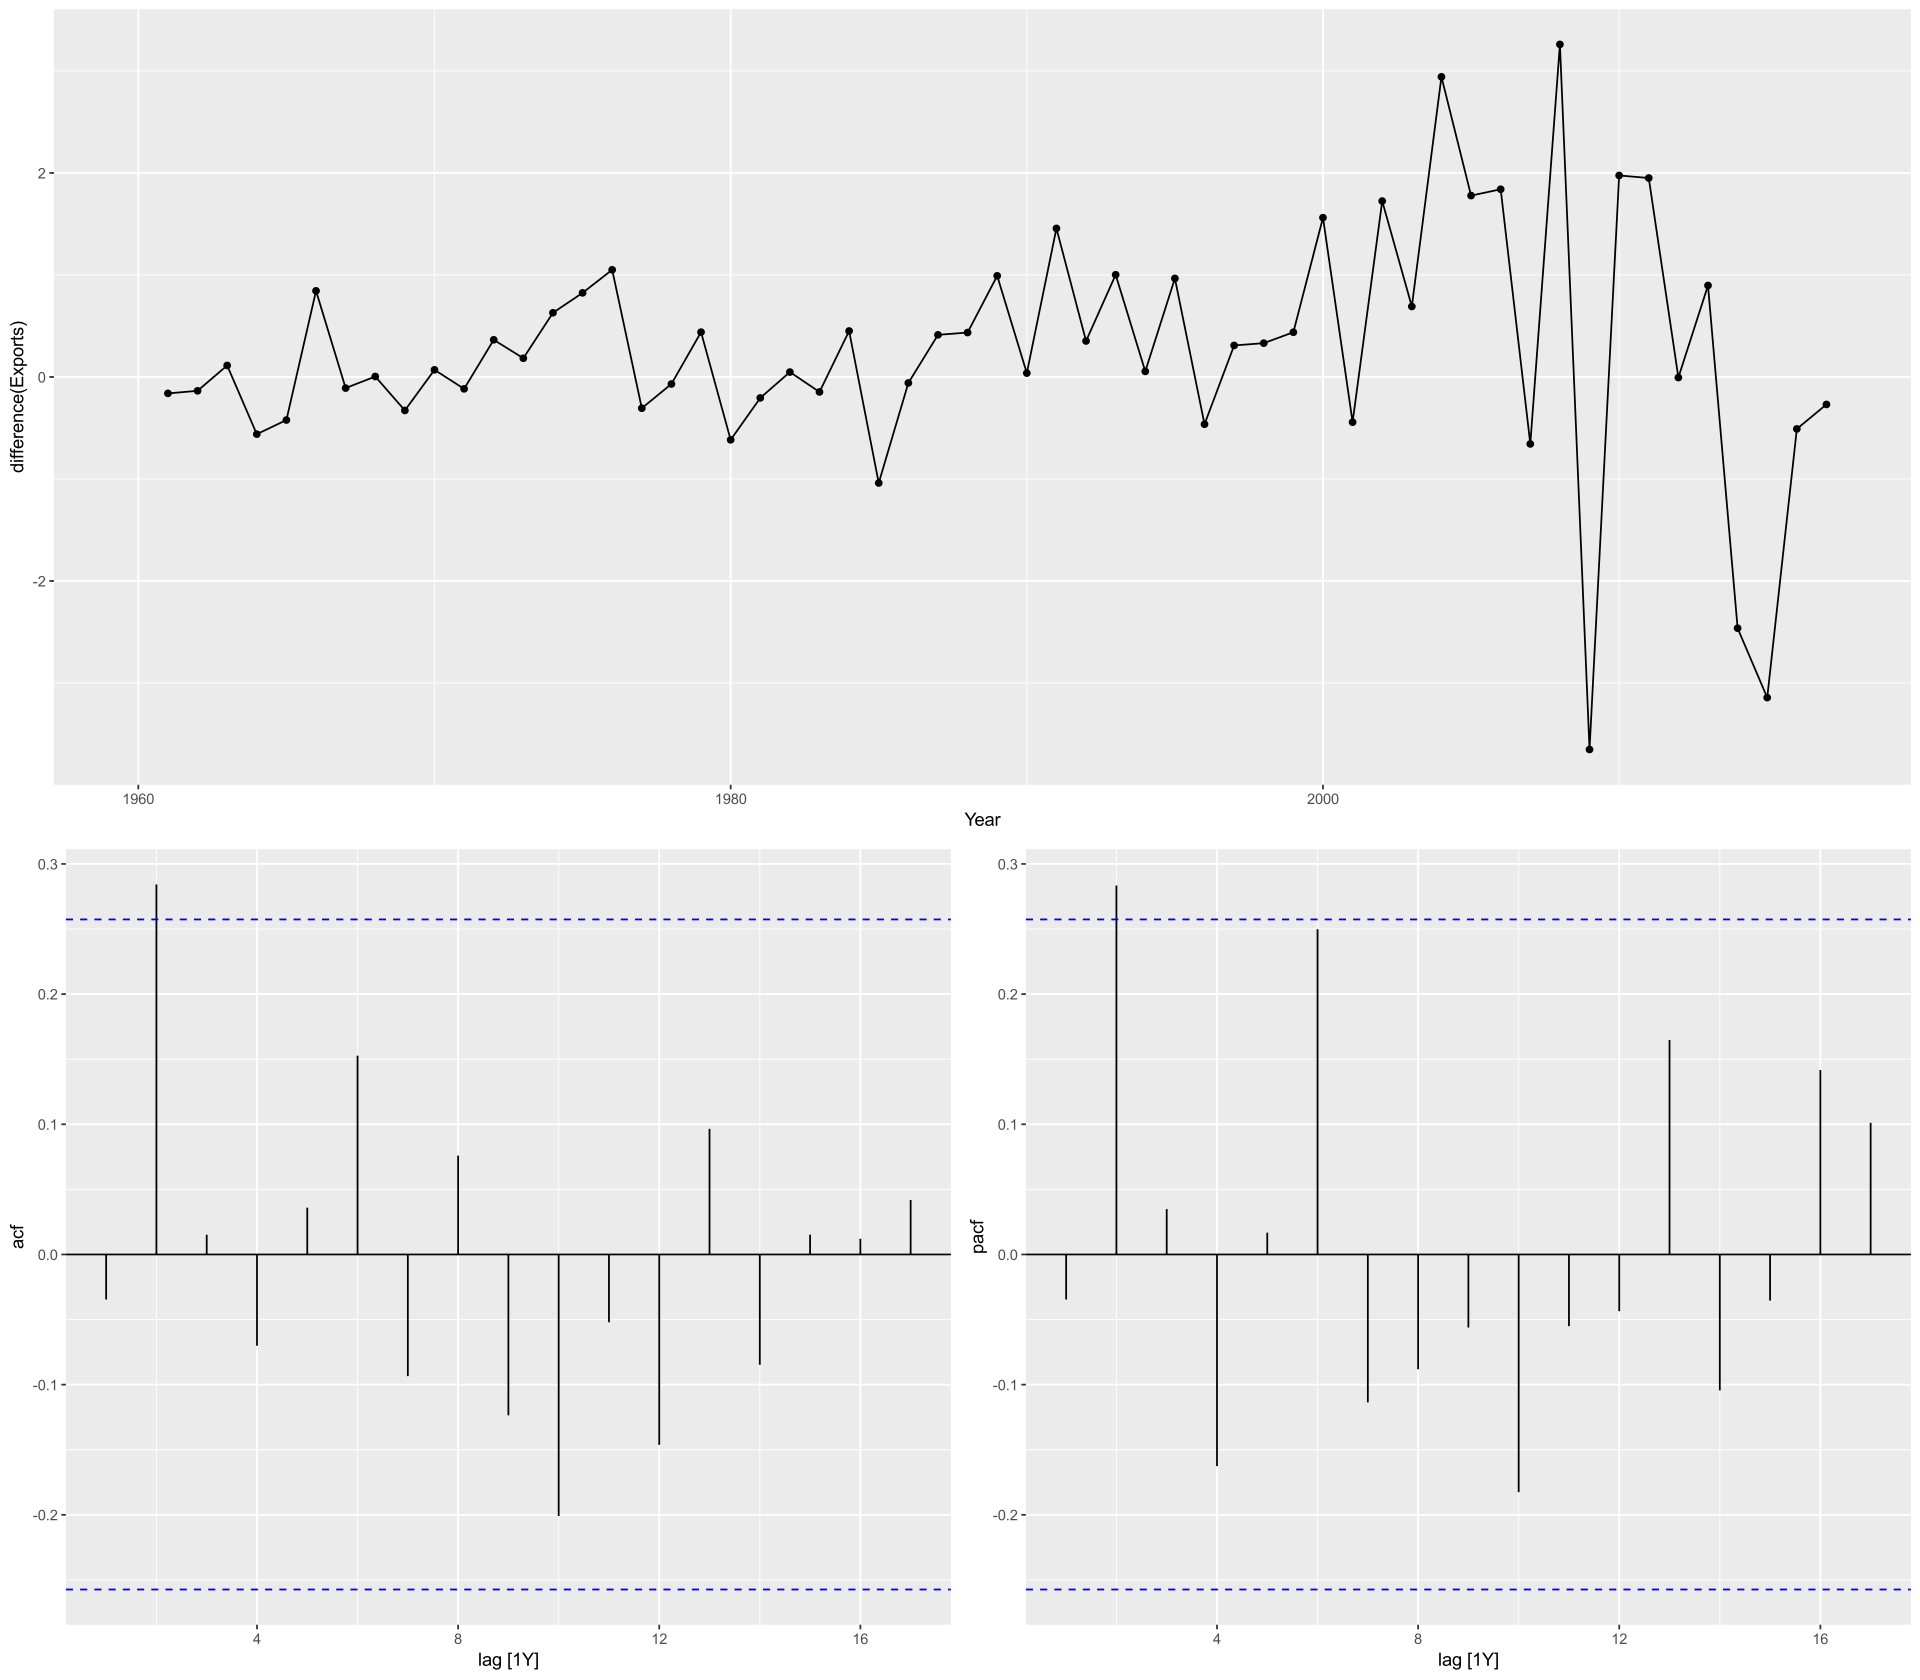

In [31]:
global_economy |>filter(Code == "IND")|>gg_tsdisplay(difference(Exports), plot_type = "partial")

In [70]:
# PACF suggests ARIMA model AR(6) so initial candidate model is ARIMA(2,1,0), while the ACF suggests MA(2) so the alternative candidate is ARIMA(0,1,2)

# We will fit both the models and compare

ind_fit <- global_economy|>filter(Code == "IND")|>model(arima610 = ARIMA(Exports ~ pdq(6,1,0)), arima012 = ARIMA(Exports ~ pdq(0,1,2)))

In [71]:
ind_fit|> pivot_longer(!Country, names_to = "Model Name", values_to = "Orders")

Country,Model Name,Orders
<fct>,<chr>,<model>
India,arima610,"<ARIMA(6,1,0)>"
India,arima012,"<ARIMA(0,1,2)>"


In [72]:
glance(ind_fit)|>arrange(AIC) |> select(.model:BIC)

.model,sigma2,log_lik,AIC,AICc,BIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
arima012,1.283946,-87.21190,180.4238,180.8766,186.5530
arima610,1.249063,-84.63294,183.2659,185.5516,197.5672


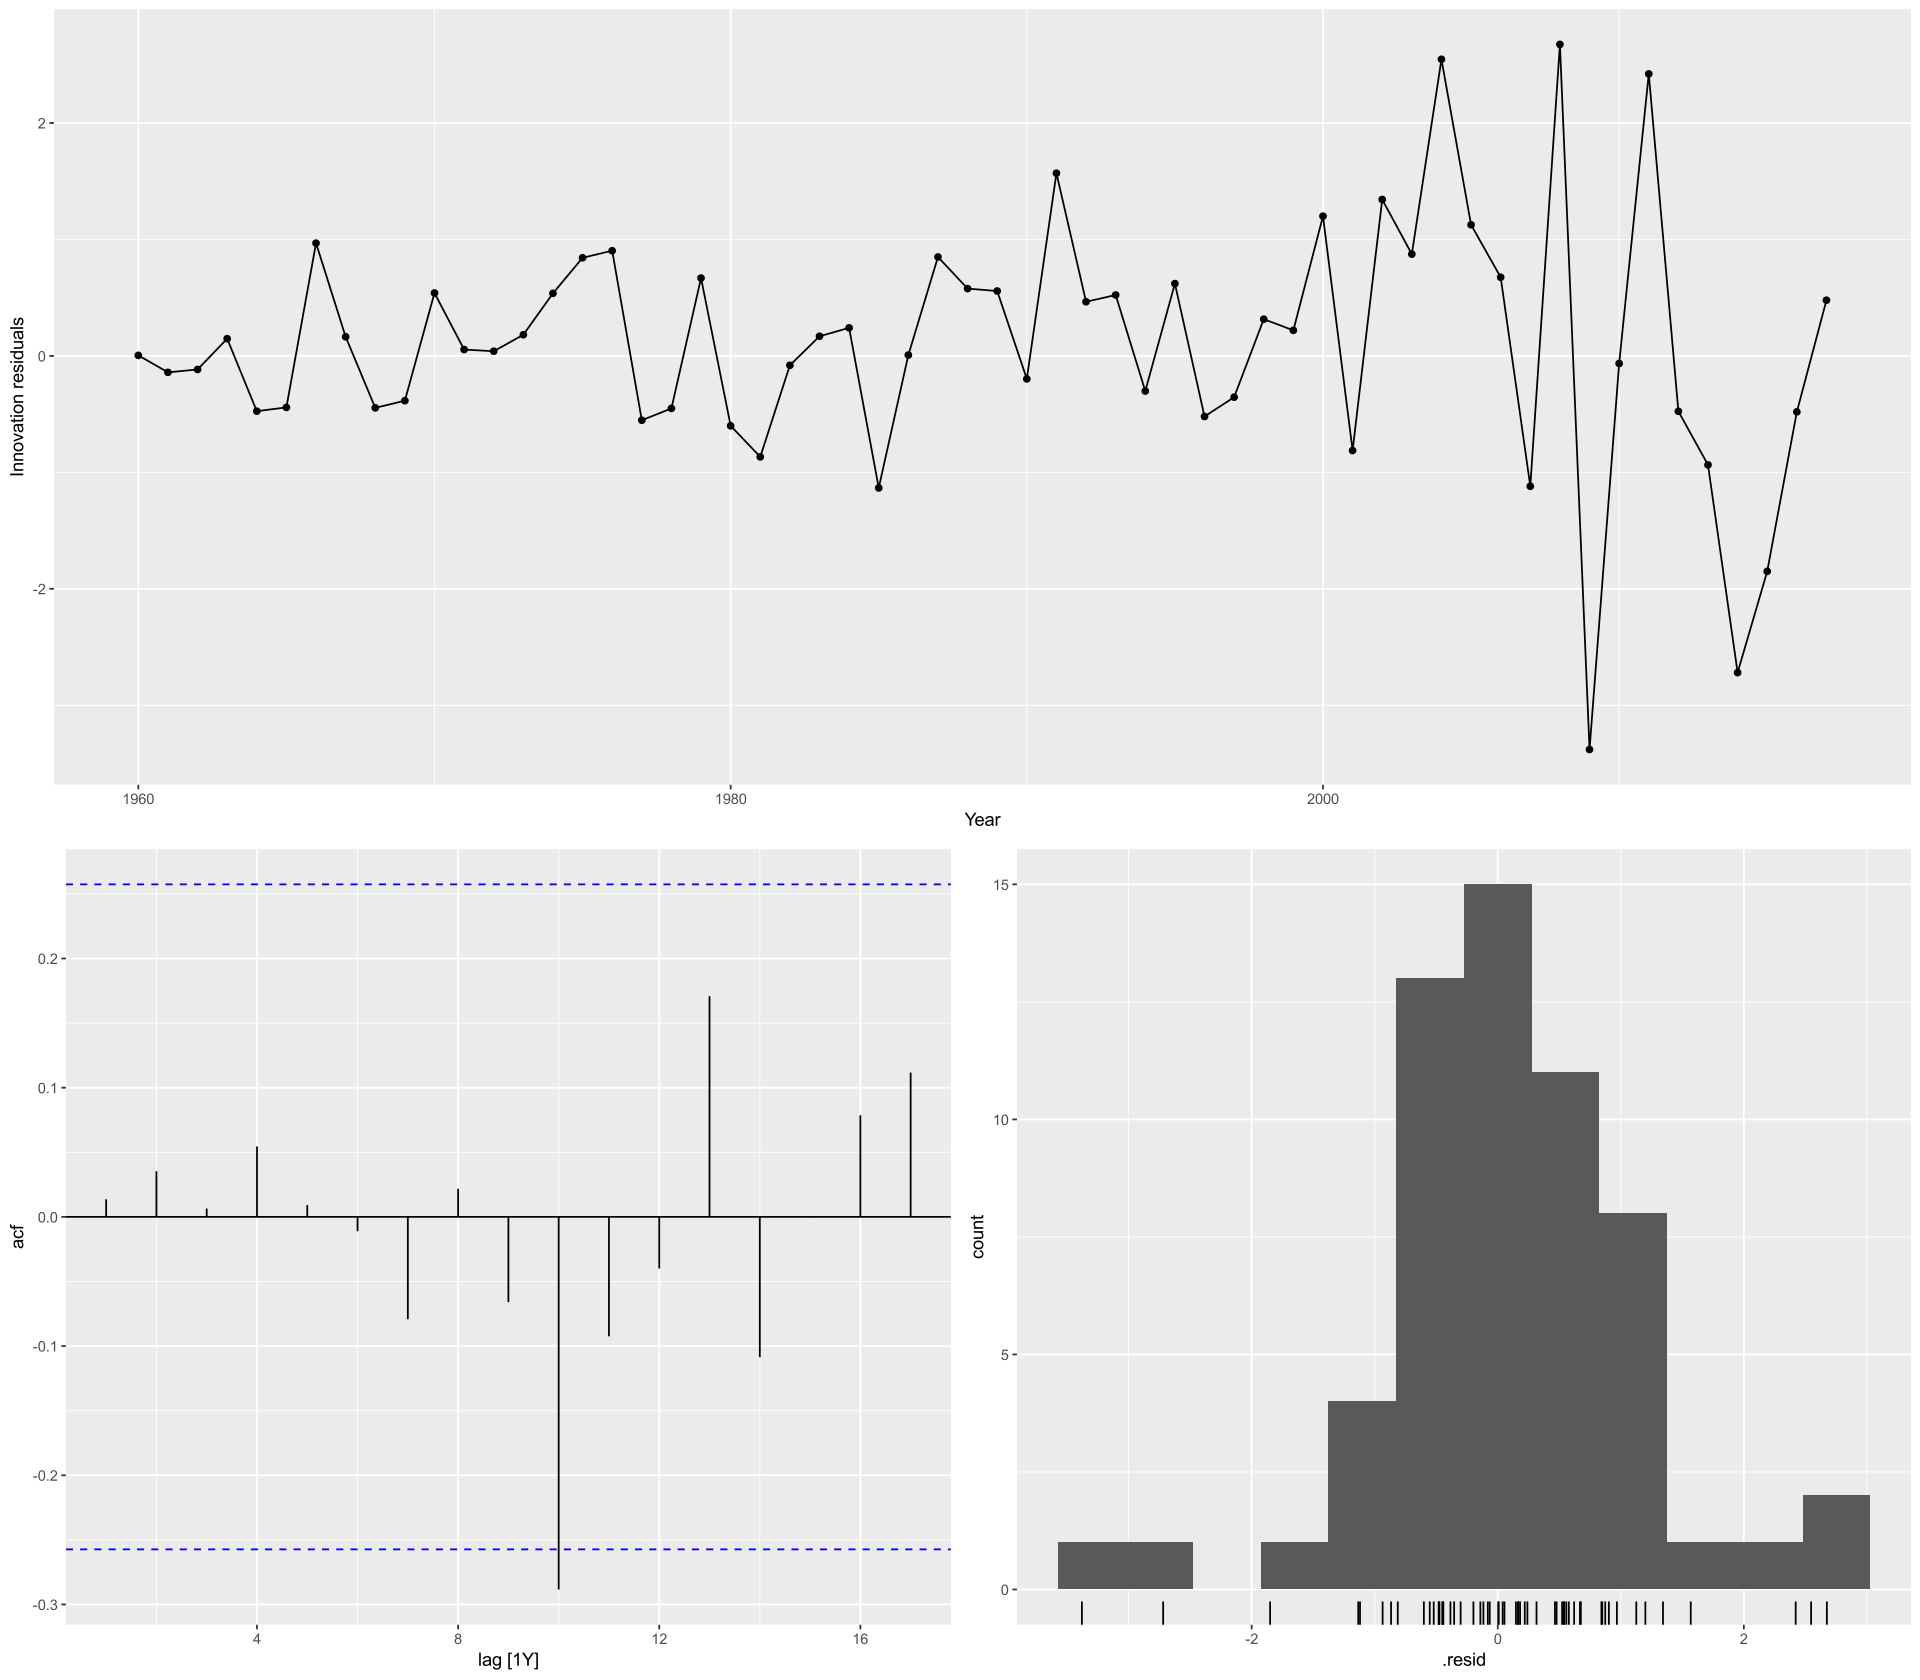

In [73]:
# Clearly arima012 is better

ind_fit|>select(arima610)|>gg_tsresiduals()

In [75]:
# Shows that autocorrelations are well within threshold limits.

# Now lets perform portmanteau test


augment(ind_fit) |> filter(.model =="arima610") |> features(.innov, ljung_box, lag=10, dof=3)

# K =3 returns large p-value>-.05 rejecting the null hypothesis i.e (residuals are not white noise), hence we can say that the residuals are indeed whitenoise

Country,.model,lb_stat,lb_pvalue
<fct>,<chr>,<dbl>,<dbl>
India,arima610,7.097114,0.418839


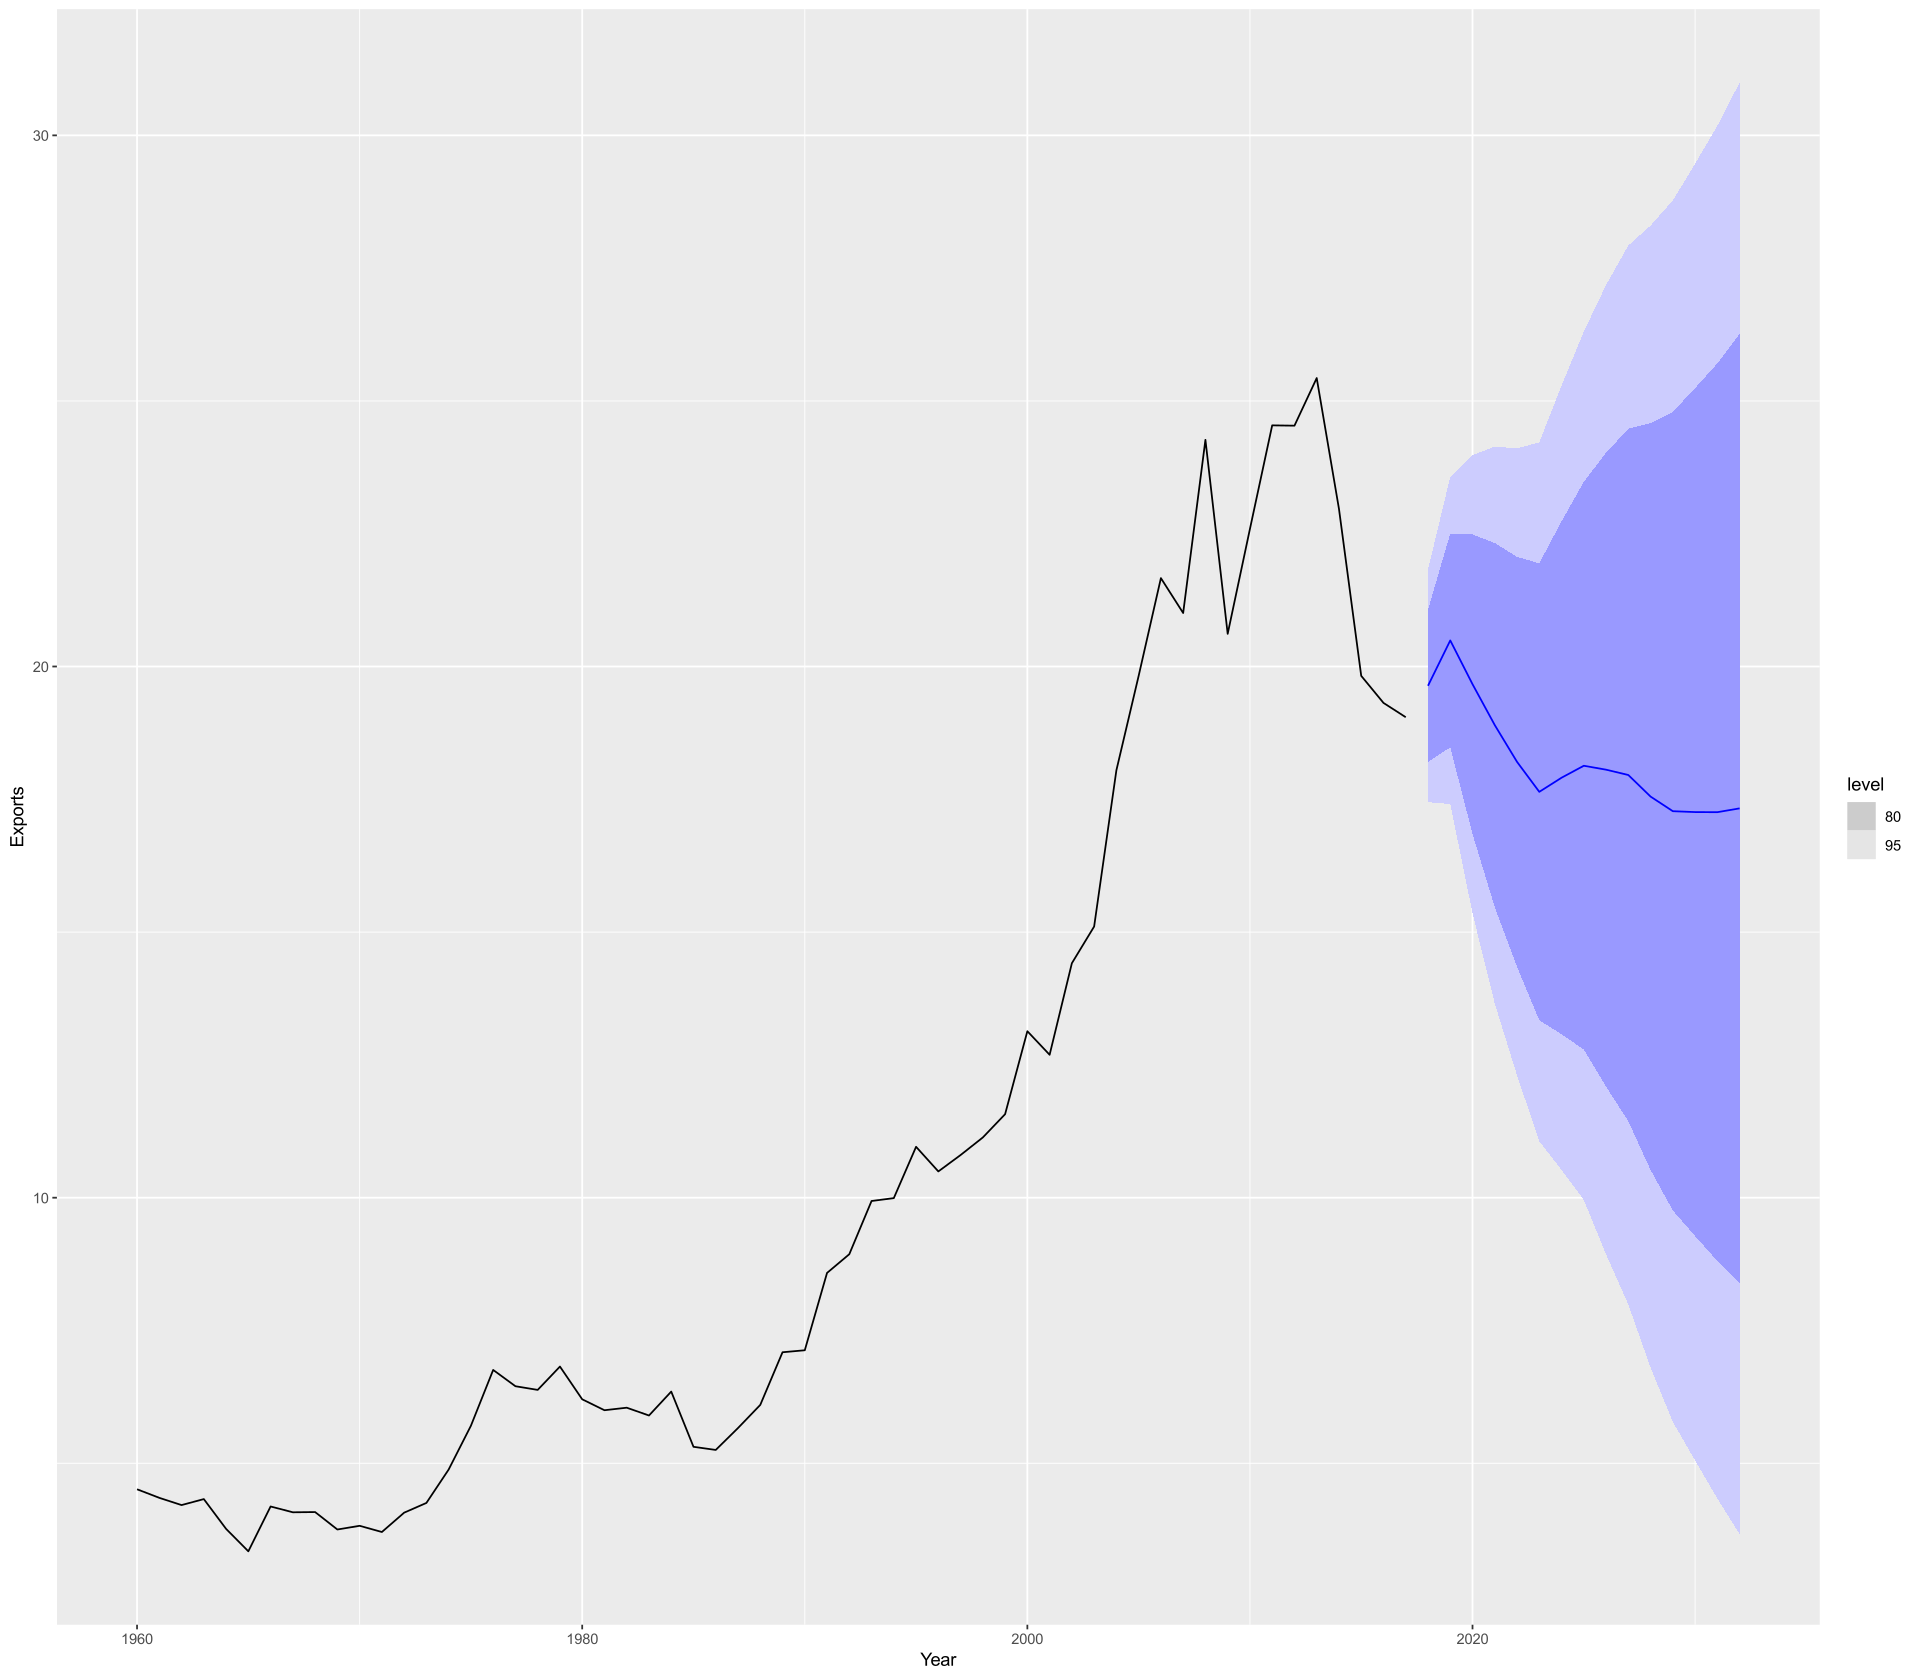

In [76]:
ind_fit |> forecast(h=15) |> filter(.model == "arima610") |> autoplot(global_economy)

9.9 -- Seasonal ARIMA models

In [78]:
# Arima models with subsequent seasonal component will look like this ARIMA(p,d,q)(P,D,Q)sub(m)

head(us_employment)

Month,Series_ID,Title,Employed
<mth>,<chr>,<chr>,<dbl>
1939 Jan,CEU0500000001,Total Private,25338
1939 Feb,CEU0500000001,Total Private,25447
1939 Mar,CEU0500000001,Total Private,25833
1939 Apr,CEU0500000001,Total Private,25801
1939 May,CEU0500000001,Total Private,26113
1939 Jun,CEU0500000001,Total Private,26485


In [85]:
total_private <- us_employment|>filter(Title == "Total Private", year(Month)>=1990)|>mutate(Employed = Employed/1000) |> select(Month, Employed)

In [91]:
options(repr.plot.width = 30, repr.plot.height = 10)

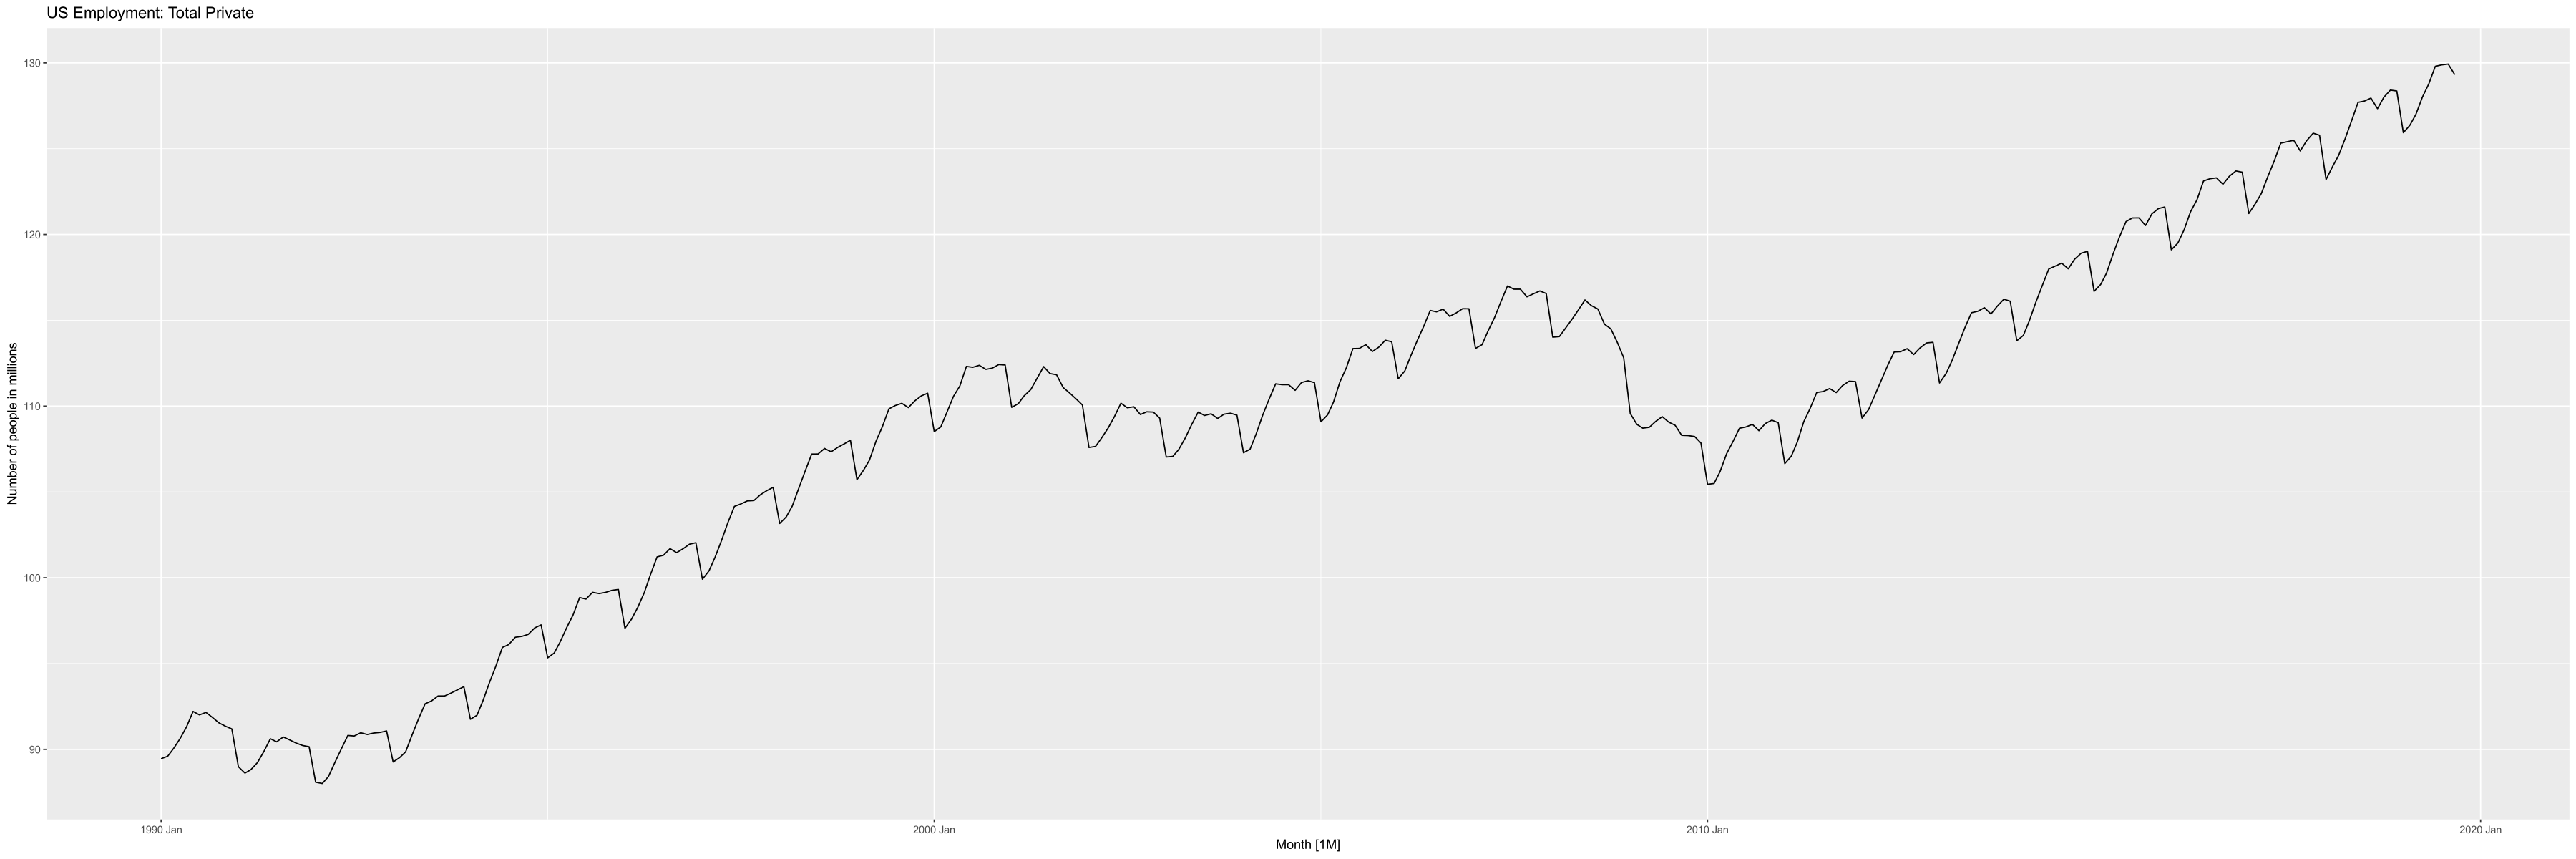

In [92]:
autoplot(total_private, Employed) + labs(title =  "US Employment: Total Private", y = "Number of people in millions")

Warning message:
“Removed 12 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 12 rows containing missing values (`geom_point()`).”


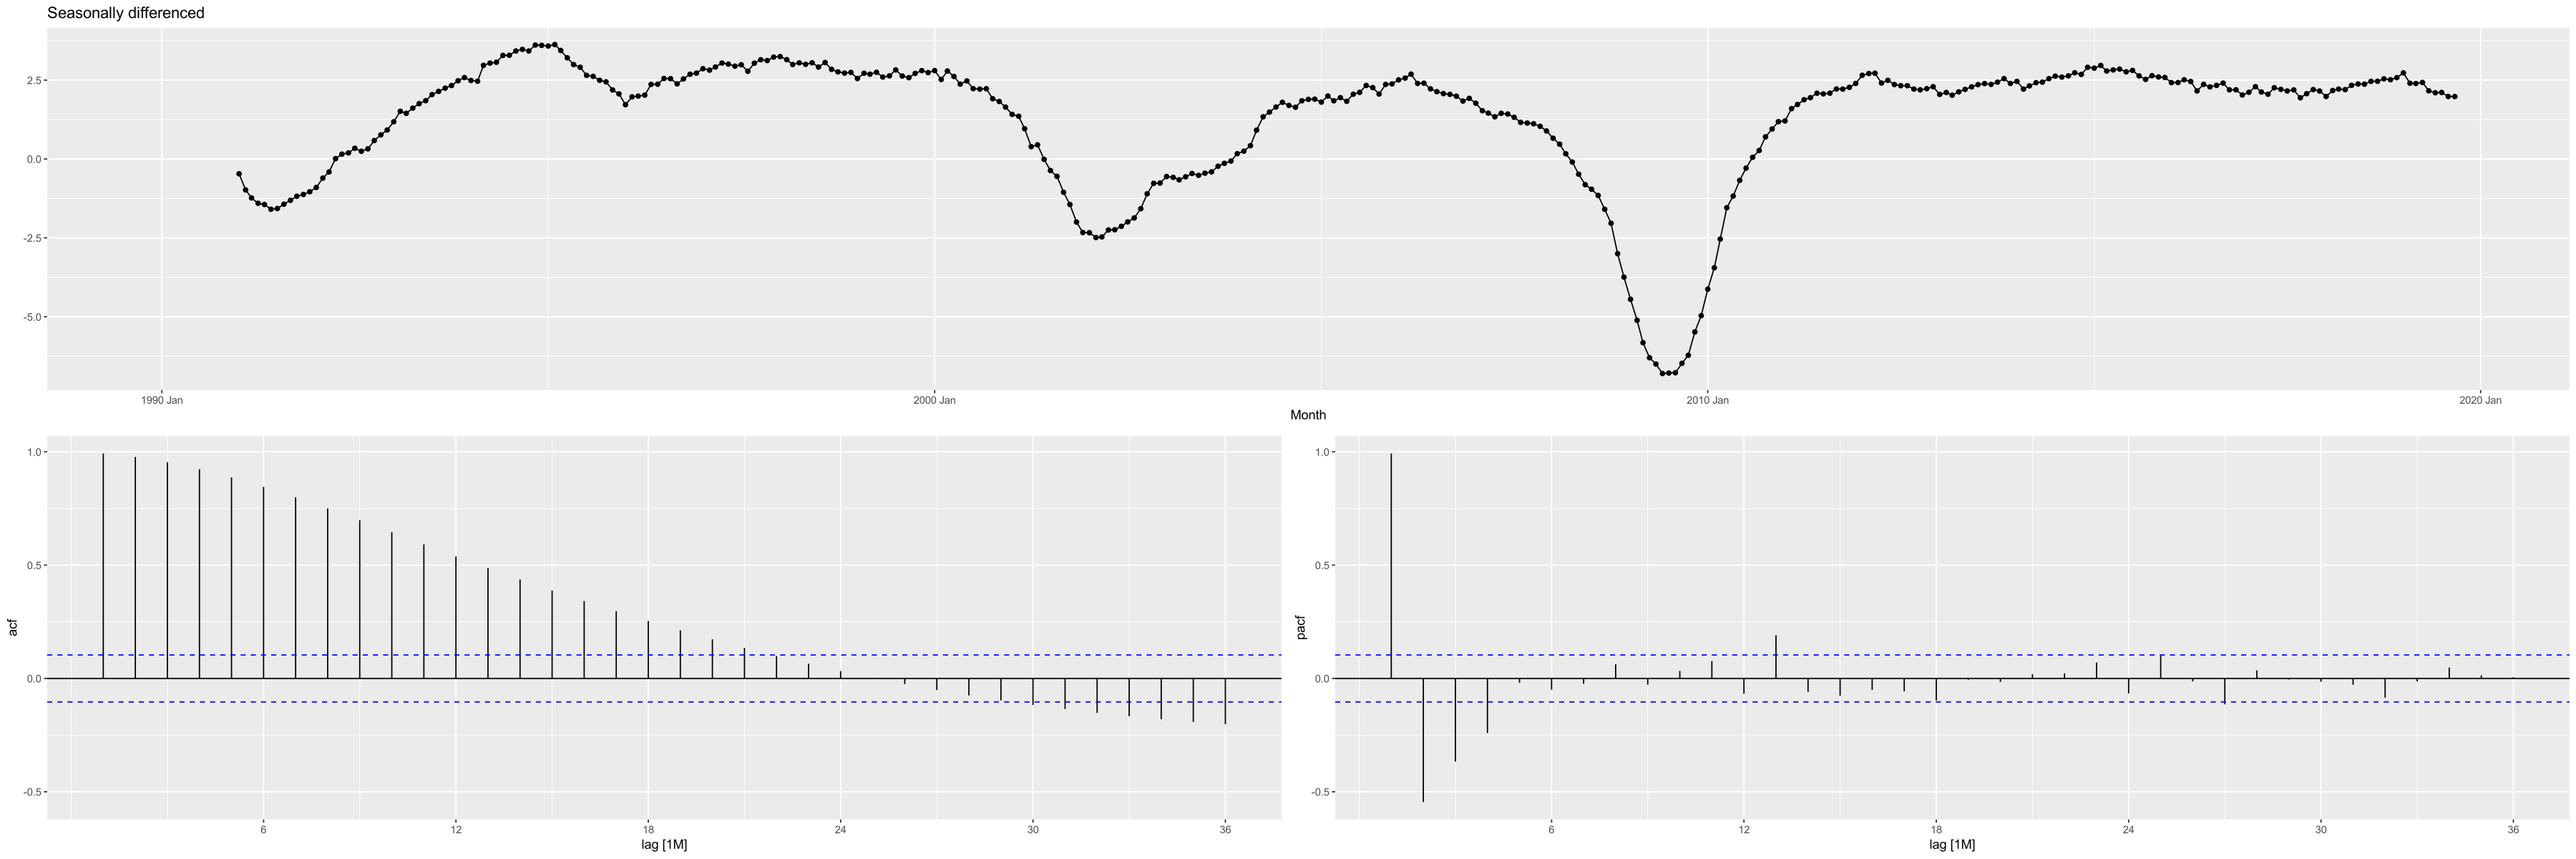

In [93]:
# The data is clearly nonstationary with strong seasonalityh and nonlinear trend, so we will first take a seasonal difference. The sesonally differenced data are shown in the following


total_private |> gg_tsdisplay(difference(Employed, 12), plot_type = 'partial', lag=36) + labs(title = "Seasonally differenced", y = "")

Warning message:
“Removed 13 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 13 rows containing missing values (`geom_point()`).”


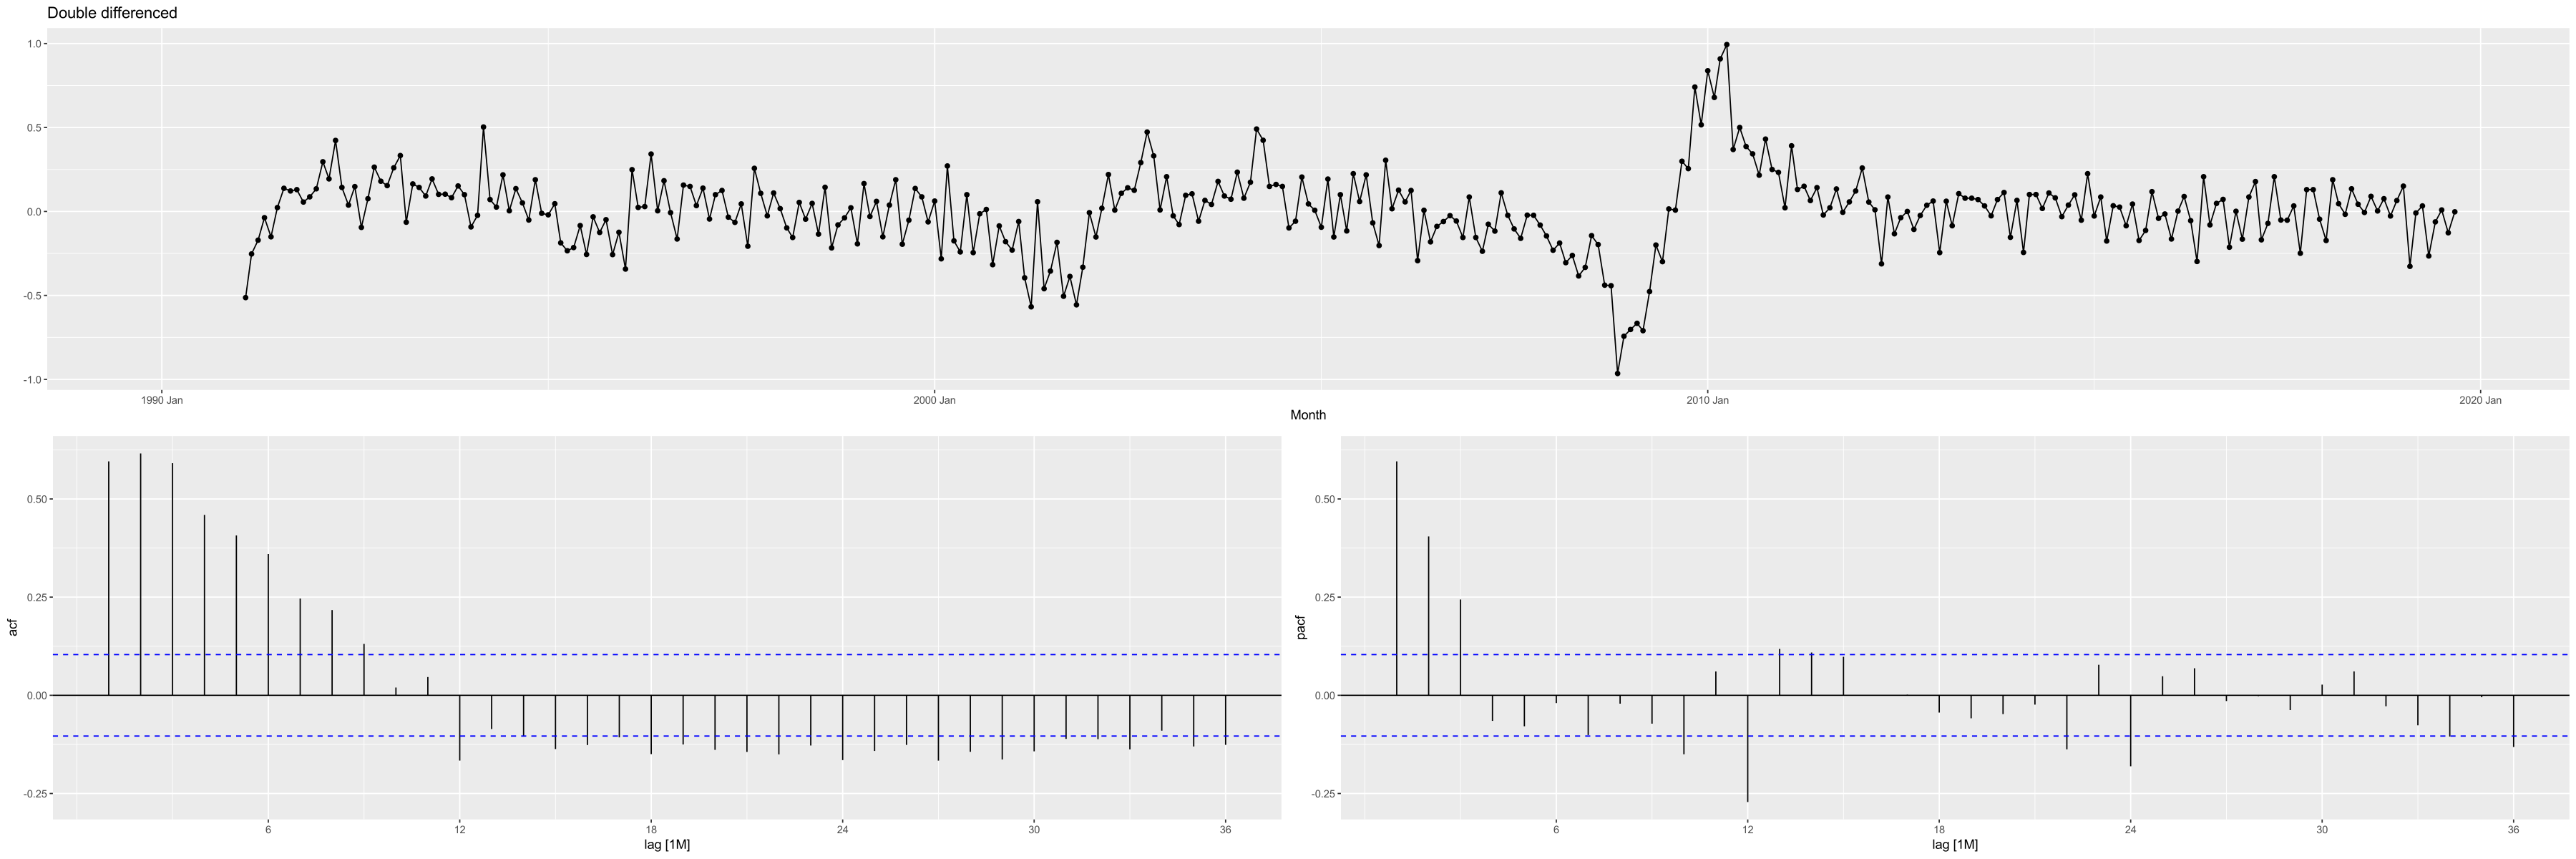

In [96]:
# Even after first difference the data is still not stationary

total_private |> gg_tsdisplay(difference(Employed, 12)|> difference(), plot_type="partial", lag=36) + labs(title = "Double differenced", y = "")

Warning message:
“Removed 14 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 14 rows containing missing values (`geom_point()`).”


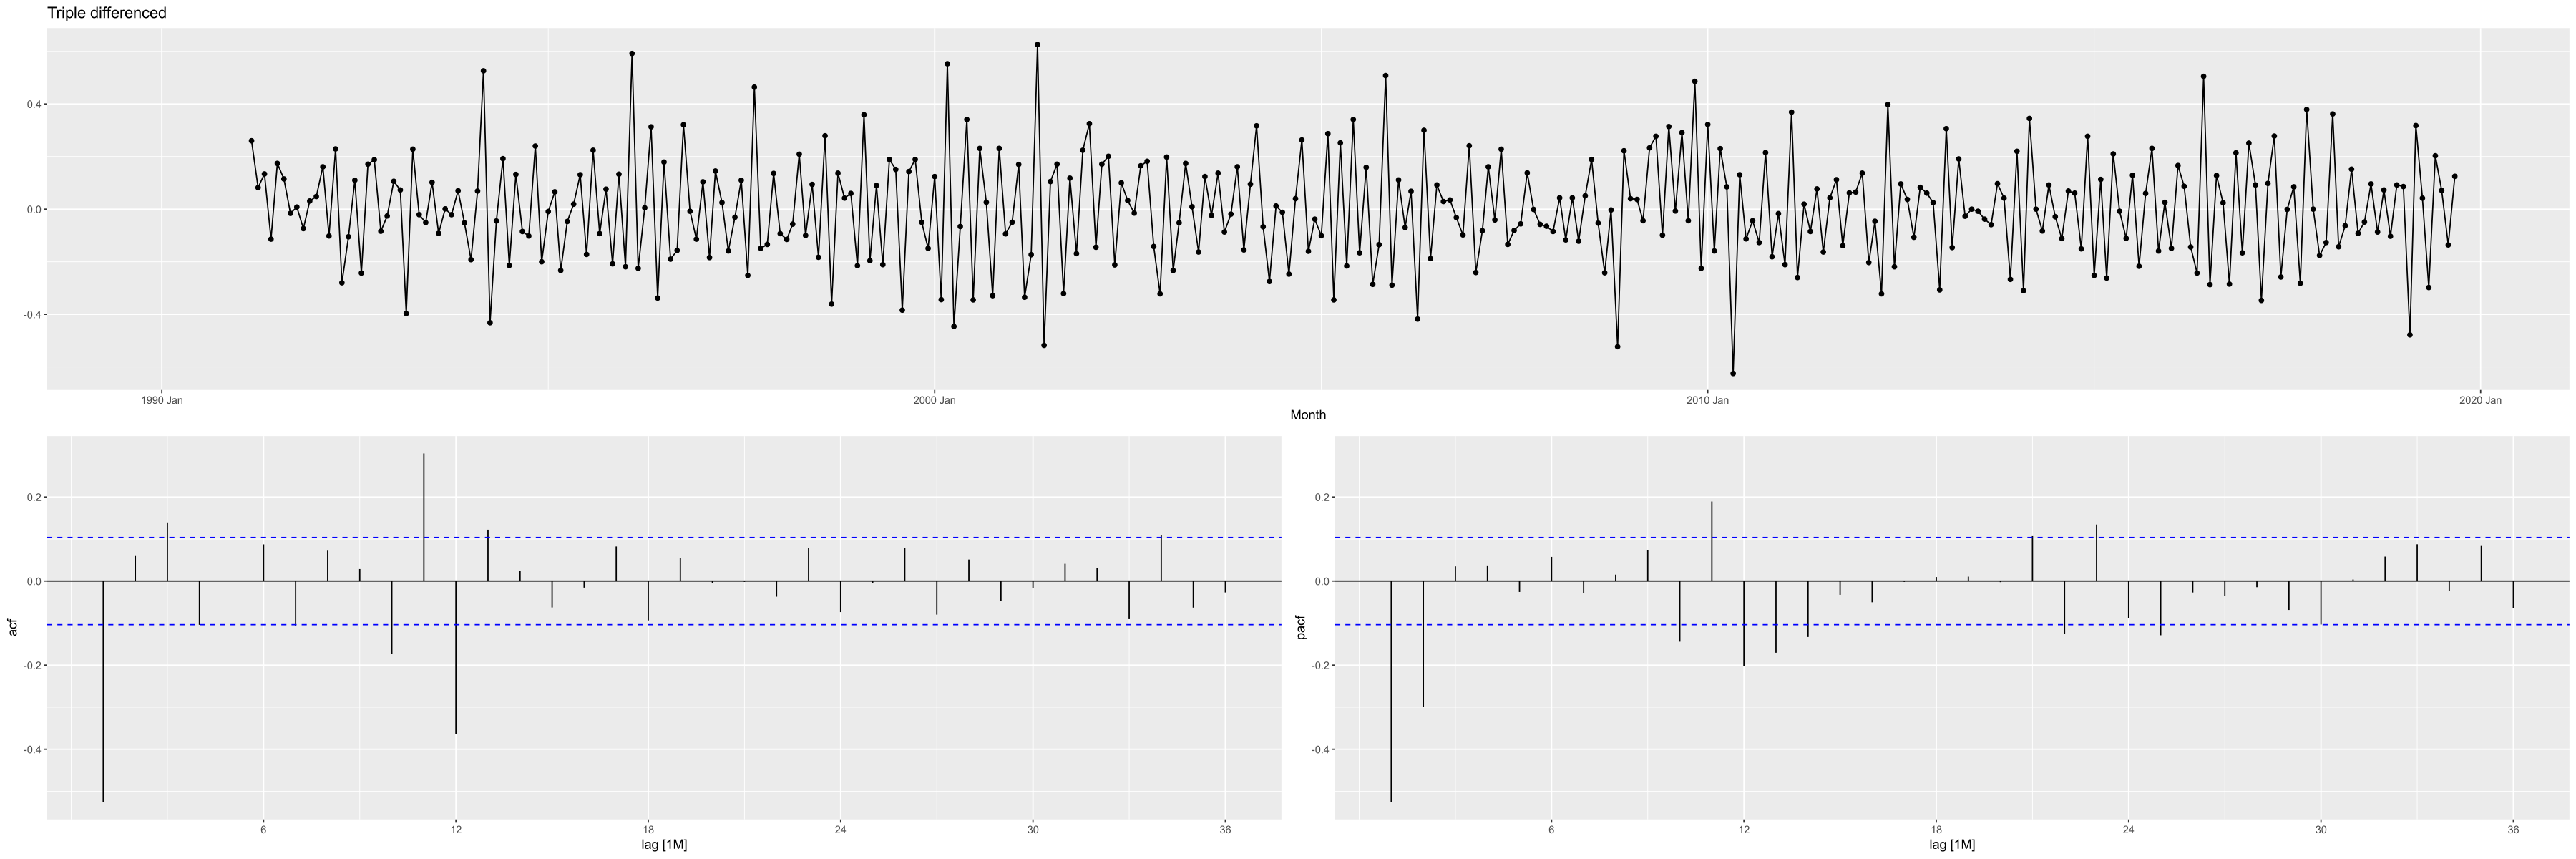

In [98]:
# Even after 2nd difference the data is still not stationary
# So we will go for the thrird difference
total_private |> gg_tsdisplay(difference(Employed, 12)|> difference()|>difference(), plot_type="partial", lag=36) + labs(title = "Triple differenced", y = "")

In [99]:
# The data now looks more like a white noise now

# We will go further

# the last significant at ACF lag 3 suggests non-seasonal MA(3) and at lag 12 suggests  seasonal MA(1)

# Consequently last significat at PACF lag 3 suggests non-seasonal AR(3) and at lag 12 suggests seasonal AR(1)

# Hence these two models relevant ARIMA(0,1,3)(0,1,1) and ARIMA(3,1,0)(1,1,0)

In [100]:
fit <- total_private|>model(arima013011 = ARIMA(Employed ~ pdq(0,1,3) + PDQ(0,1,1)), arima310011 = ARIMA(Employed ~ pdq(3,1,0) + PDQ(0,1,1)))

In [101]:
fit |> pivot_longer(everything(), names_to = "Model name", values_to = "Orders")

Model name,Orders
<chr>,<model>
arima013011,"<ARIMA(0,1,3)(0,1,1)[12]>"
arima310011,"<ARIMA(3,1,0)(0,1,1)[12]>"


In [102]:
glance(fit) |> arrange(AICc) |> select(.model:BIC)

.model,sigma2,log_lik,AIC,AICc,BIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
arima310011,0.02089021,178.9358,-347.8715,-347.6940,-328.6683
arima013011,0.02683037,136.1437,-262.2874,-262.1098,-243.0842


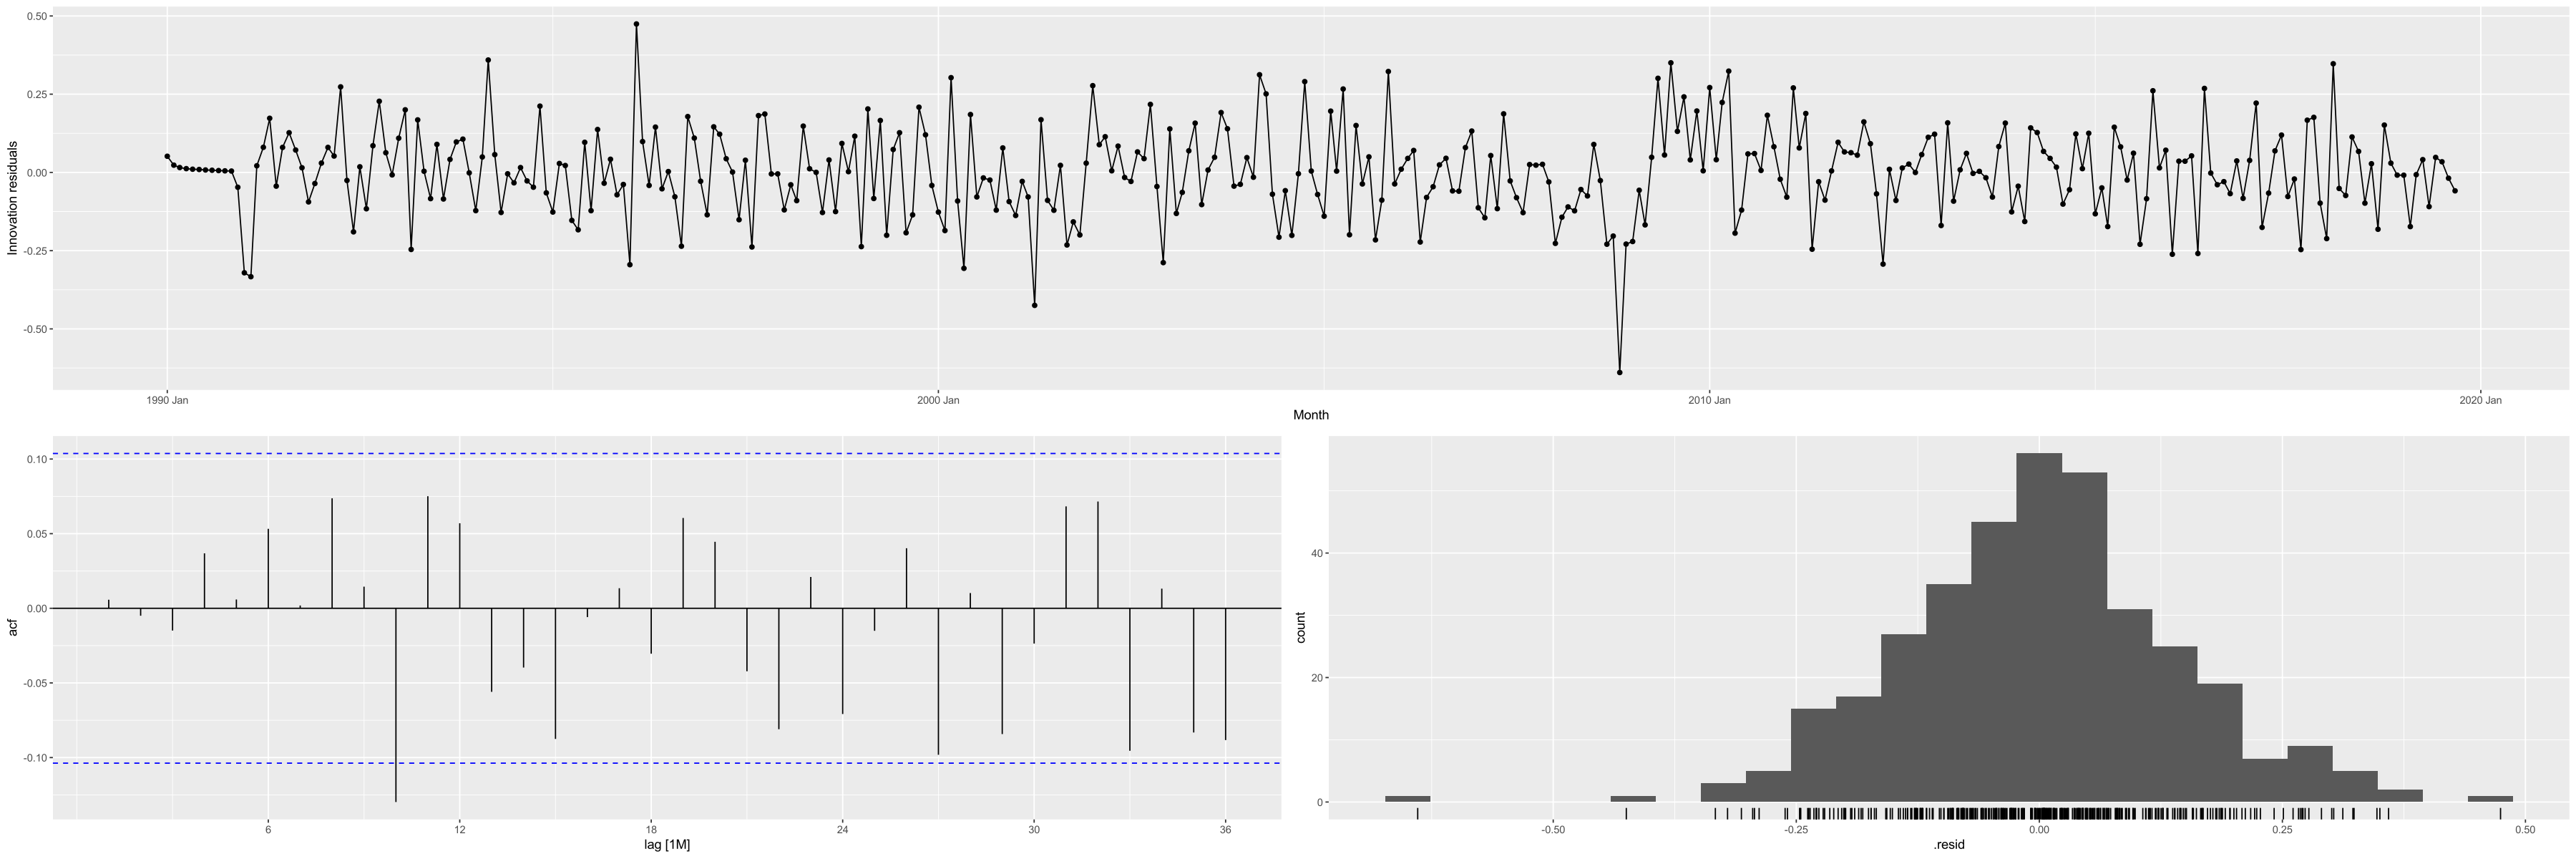

In [105]:
# plot the residuals

fit  |> select(arima310011) |>gg_tsresiduals(lag=36)

In [107]:
# resid looks quite like white noise but still we will chcekc

augment(fit) |> filter(.model == "arima310011") |> features(.innov, ljung_box, lag=24, dof=4)

.model,lb_stat,lb_pvalue
<chr>,<dbl>,<dbl>
arima310011,25.71645,0.1753824


In [108]:
# The large p-value which is > 0.05 suggests that we can reject the null hypothesis and say that this is quite a white noise

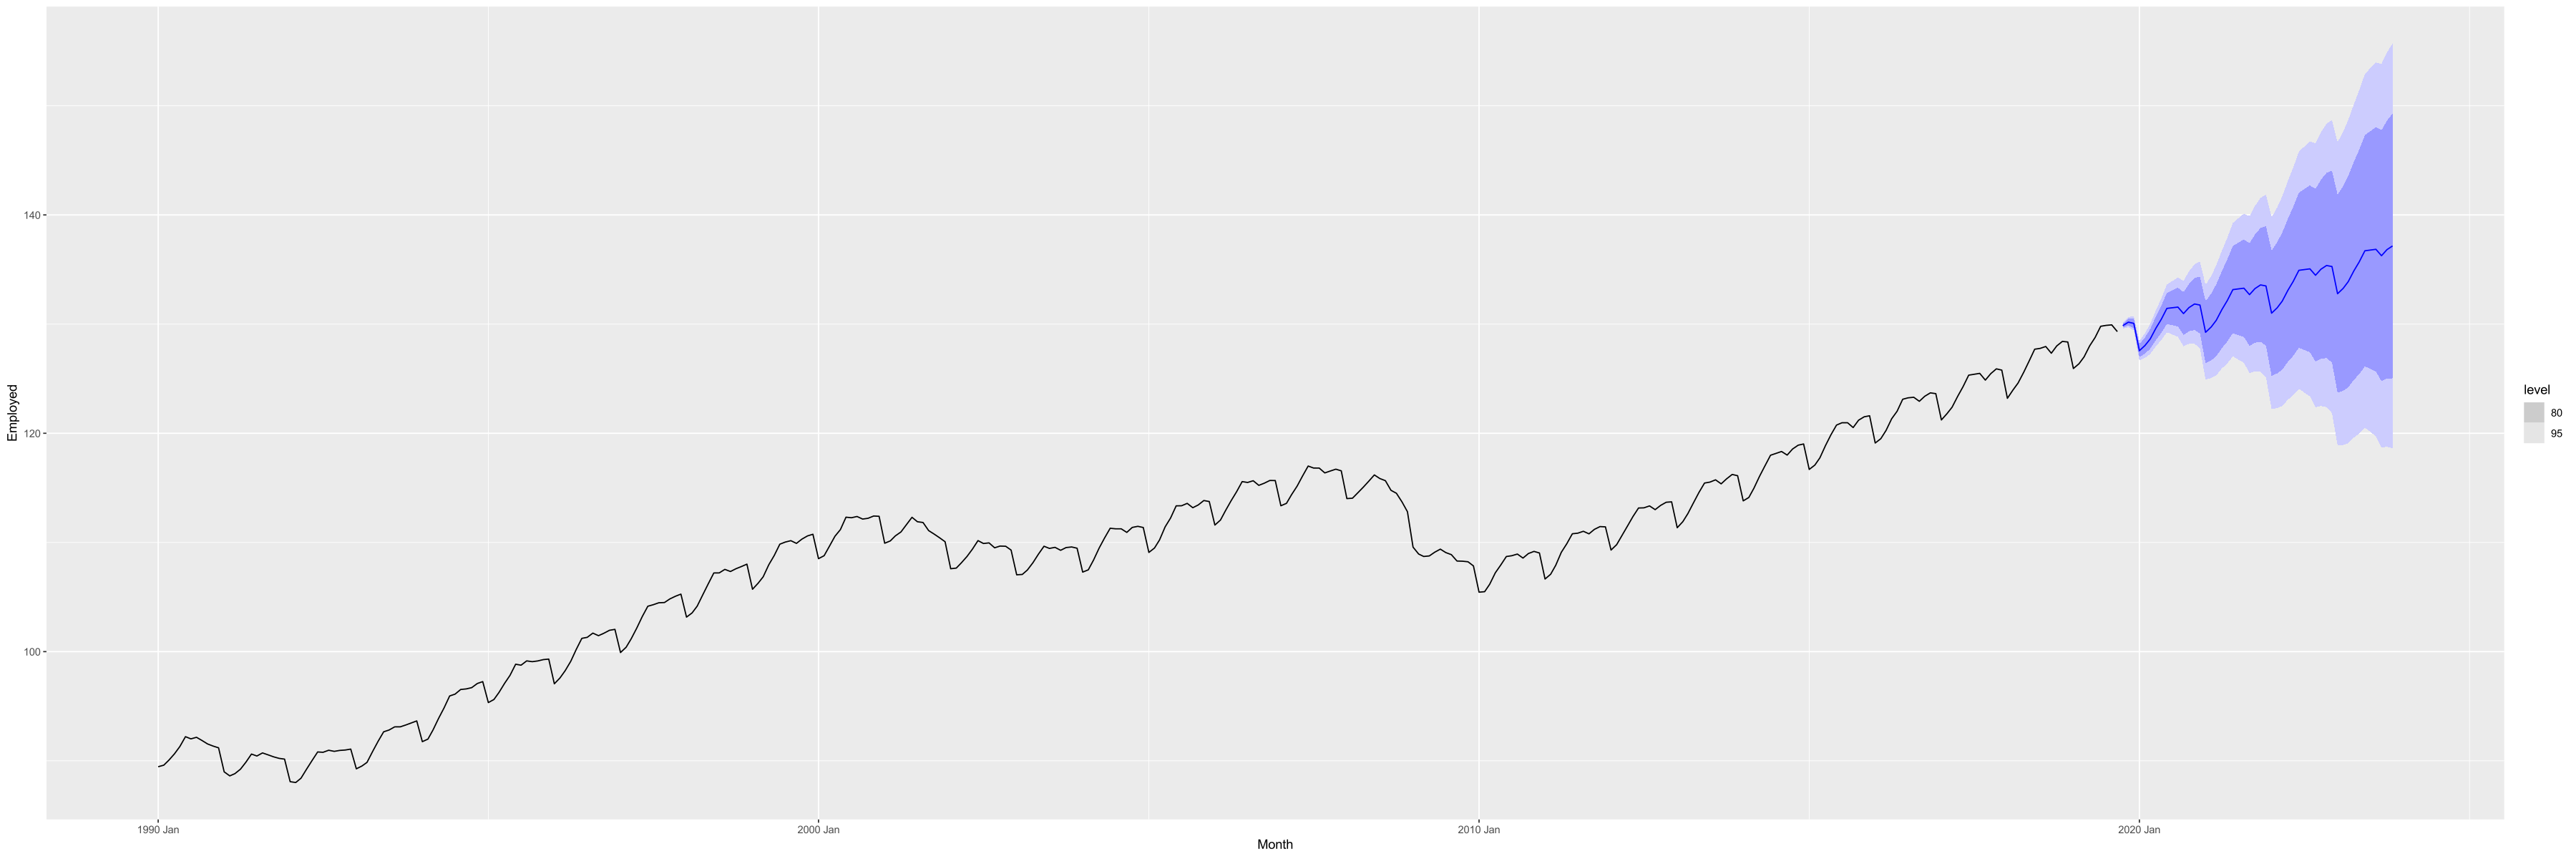

In [113]:
# Now we will create a forecast to suggest the future trajectroy


forecast(fit,h=50)|>filter(.model == "arima310011")|> autoplot(total_private)

In [ ]:
#Example: Corticosteroid drug sales in Australia
